In [1]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

## Motivation
    Of the 7 cell types, this is most well understood from the biological perspective. As a result, here is an opportunity to use existing knowledge hone the right methods. Variables to consider:
    - TF Activity vs Expression
    - Strength of filter on expression matrix
    - Expression data: Log transform or not; Batch corrected data or not
    - Prior filtering: using DamID, honing FIMO p-values

### Convert gene symbols to Gene ids

This section is taken directly from "Create TSV from Matrix"


In [2]:
gtf = pd.read_csv('~/Dev/Drosophila_inferelator/Drosophila_melanogaster.BDGP6.91.genes.gtf', sep='\t', header = None)
gene_sym_to_id = {}
gene_id_to_sym = {}
gtf.head()

,0,1,2,3,4,5,6,7,8
0,3R,FlyBase,gene,567076,2532932,.,+,.,"gene_id ""FBgn0267431""; gene_name ""Myo81F""; gen..."
1,3R,FlyBase,gene,722370,722621,.,-,.,"gene_id ""FBgn0085804""; gene_name ""CR41571""; ge..."
2,3R,FlyBase,gene,1031171,1031354,.,+,.,"gene_id ""FBgn0039987""; gene_name ""CR12798""; ge..."
3,3R,FlyBase,gene,1366234,1366601,.,-,.,"gene_id ""FBgn0267798""; gene_name ""CR46123""; ge..."
4,3R,FlyBase,gene,1865108,1866008,.,-,.,"gene_id ""FBgn0267797""; gene_name ""CR46122""; ge..."


In [3]:
for (idx, row) in gtf.iterrows():
    st = row[8]
    splits = st.split(';')
    i = splits[0].split(" ")[1].strip('"')
    sym = splits[1].split(" ")[2].strip('"').rstrip(';').rstrip('"').replace(';', '')
    gene_sym_to_id[sym] = i
    gene_id_to_sym[i] = sym 

In [4]:
def convert_df_from_Fbgn_ids_to_symbols(df):
    subset_index = set(gene_id_to_sym.keys()).intersection(df.index)
    if len(subset_index) == 0:
        print 'Error: No overlap found. Aborting'
        return
    new_index = [gene_id_to_sym[i] for i in subset_index]
    lost_genes = df.shape[0] - len(new_index)
    print 'Converting dataframe. Losing {} genes out of an index size of {}'.format(lost_genes, df.shape[0])
    df = df.loc[subset_index, :]
    df.index = new_index
    return df

def convert_df_from_symbols_to_Fbgn_ids(df):
    subset_index = set(gene_sym_to_id.keys()).intersection(df.index)
    if len(subset_index) == 0:
        print 'Error: No overlap found. Aborting'
        return
    new_index = [gene_sym_to_id[sym] for sym in subset_index]
    lost_genes = df.shape[0] - len(new_index)
    print 'Converting dataframe. Losing {} genes out of an index size of {}'.format(lost_genes, df.shape[0])
    df = df.loc[subset_index, :]
    df.index = new_index
    return df

In [5]:
matrices_dir = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/network_inputs_and_outputs/inputs/03_02_2018"
mat_file = 'TF_data.csv'

In [6]:
exp = pd.read_csv(os.path.join(matrices_dir, mat_file), sep=',', index_col  = 0) #sep='\t',
exp = convert_df_from_symbols_to_Fbgn_ids(exp)

Converting dataframe. Losing 76 genes out of an index size of 11264


In [7]:
exp.head()

,soma_wtF_AAACCTGTCCGCAGTG,soma_wtF_AAAGTAGCAGACGCAA,soma_wtF_AACGTTGTCTCCAACC,soma_wtF_AACTCCCAGTGCCAGA,soma_wtF_AAGACCTTCTCTGCTG,soma_wtF_AAGTCTGTCCCTGACT,soma_wtF_AATCCAGGTTATTCTC,soma_wtF_ACACCAAAGCTTCGCG,soma_wtF_ACACCAATCACCGGGT,soma_wtF_ACGCAGCGTCGACTAT,...,soma_wtJ_TGACAACGTACGACCC,soma_wtJ_TGACTTTCAGACGCTC,soma_wtJ_TGCACCTCAAGCTGGA,soma_wtJ_TGCACCTTCACAACGT,soma_wtJ_TGCCAAACATTCGACA,soma_wtJ_TGGCGCACAGCATGAG,soma_wtJ_TGGCGCACAGCCACCA,soma_wtJ_TGTCCCATCCAATGGT,soma_wtJ_TTCGGTCAGAGCTGCA,soma_wtJ_TTGTAGGGTTGGACCC
FBgn0039266,0.498776,0.452943,1.054567,0.815635,1.438181,1.183812,1.768935,0.582660,0.000000,0.694852,...,1.405993,0.655051,0.817161,1.510867,1.156705,0.776139,1.060832,0.451694,1.664950,0.516844
FBgn0039265,1.078449,1.490115,1.054567,0.815635,1.144865,1.343779,0.963760,0.333179,0.568313,0.000000,...,0.479902,1.047488,1.063363,0.000000,0.546085,1.207805,0.903831,0.451694,0.000000,0.855884
FBgn0030674,0.000000,0.452943,0.000000,0.609987,0.728035,0.448972,0.000000,0.333179,0.000000,0.000000,...,0.000000,0.000000,0.489825,0.000000,0.000000,0.330039,0.190508,0.998024,0.728202,0.855884
FBgn0033788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FBgn0033792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
convert_df_from_symbols_to_Fbgn_ids(exp)

Error: No overlap found. Aborting


In [9]:
row_medians = exp.median(axis=1)

In [10]:
row_means = exp.mean(axis=1)

//anaconda/envs/py27.13/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


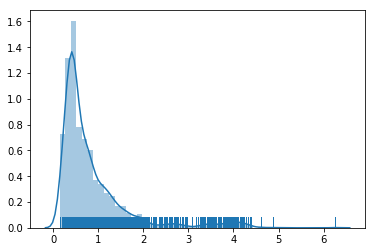

In [11]:
sns.distplot(row_medians[row_medians != 0], rug=True);

In [12]:
filtered_exp = exp[row_medians != 0]

In [13]:
filtered_exp.shape

(2317, 175)

In [14]:
# Filter for 95% non-zero

In [15]:
percent_nonzero = (exp > 0).sum(axis = 1) / exp.shape[1]
percent_nonzero_filter = .95

In [16]:
num_genes_above_filter = []
increment = .001
cutoffs = [i * increment for i in range(1005) if i * increment <= 1]
for i in cutoffs:
    num_genes_above_filter.append(percent_nonzero[percent_nonzero > i].shape[0])
    

In [17]:
cutoffs[0]

0.0

In [18]:
num_genes_above_filter_downsampled = []
increment = .1
cutoffs_downsampled = [i * increment for i in range(200) if (i * increment < 1 and  i * increment > .3)  ]
for i in cutoffs_downsampled:
    num_genes_above_filter_downsampled.append(percent_nonzero[percent_nonzero > i].shape[0])
    

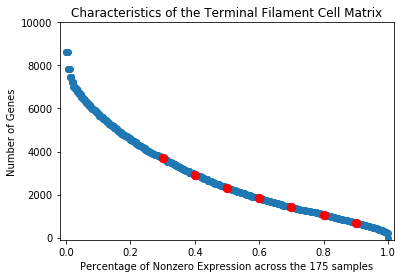

In [19]:
plt.scatter(cutoffs, num_genes_above_filter)
plt.scatter(cutoffs_downsampled, num_genes_above_filter_downsampled, c='red', s =70)
plt.xlabel('Percentage of Nonzero Expression across the {} samples'.format(exp.shape[1]))
plt.ylabel('Number of Genes')
plt.title('Characteristics of the Terminal Filament Cell Matrix')
plt.ylim( (-100, 10000) )
plt.xlim((-.02, 1.02))
plt.show()

In [137]:
# Save samples of the filter to disk for inferelator runs
for i in cutoffs_downsampled:
    temp_exp = exp[percent_nonzero > i]
    filename = 'expression_filtered_at_a_fraction_of_{}_nonzero_samples.tsv'.format(i)
    temp_exp.to_csv(os.path.join(matrices_dir, filename), sep='\t', index_col  = 0)
    print 'Rows at a fraction of {}: {}'.format(i, temp_exp.shape[0])

Rows at a fraction of 0.3: 3687
Rows at a fraction of 0.4: 2919
Rows at a fraction of 0.5: 2317
Rows at a fraction of 0.6: 1821
Rows at a fraction of 0.7: 1404
Rows at a fraction of 0.8: 1058
Rows at a fraction of 0.9: 696


In [139]:
temp_exp.head()

,soma_wtF_AAACCTGTCCGCAGTG,soma_wtF_AAAGTAGCAGACGCAA,soma_wtF_AACGTTGTCTCCAACC,soma_wtF_AACTCCCAGTGCCAGA,soma_wtF_AAGACCTTCTCTGCTG,soma_wtF_AAGTCTGTCCCTGACT,soma_wtF_AATCCAGGTTATTCTC,soma_wtF_ACACCAAAGCTTCGCG,soma_wtF_ACACCAATCACCGGGT,soma_wtF_ACGCAGCGTCGACTAT,...,soma_wtJ_TGACAACGTACGACCC,soma_wtJ_TGACTTTCAGACGCTC,soma_wtJ_TGCACCTCAAGCTGGA,soma_wtJ_TGCACCTTCACAACGT,soma_wtJ_TGCCAAACATTCGACA,soma_wtJ_TGGCGCACAGCATGAG,soma_wtJ_TGGCGCACAGCCACCA,soma_wtJ_TGTCCCATCCAATGGT,soma_wtJ_TTCGGTCAGAGCTGCA,soma_wtJ_TTGTAGGGTTGGACCC
FBgn0039266,0.498776,0.452943,1.054567,0.815635,1.438181,1.183812,1.768935,0.582660,0.000000,0.694852,...,1.405993,0.655051,0.817161,1.510867,1.156705,0.776139,1.060832,0.451694,1.664950,0.516844
FBgn0051715,0.498776,1.490115,1.452499,1.131730,0.728035,0.757718,0.732859,0.782162,0.928446,1.100884,...,1.046528,0.655051,1.425553,0.777895,1.362494,0.941603,1.370696,0.998024,0.000000,0.516844
FBgn0004907,2.843025,3.125510,2.770453,2.991180,2.702910,3.115053,3.142468,2.490817,2.692947,2.642220,...,2.634348,2.699925,3.167714,2.826601,3.060651,3.113792,2.854708,2.726171,2.837339,2.885816
FBgn0046214,1.709633,1.351877,1.336605,1.472845,2.139720,1.481651,1.857097,1.935999,1.574108,1.948830,...,1.546603,2.232931,1.690874,2.398216,1.678755,1.867842,1.928063,1.349334,1.438426,1.621438
FBgn0083167,1.078449,1.817494,1.736393,1.929032,1.438181,1.602797,0.963760,1.748290,1.401465,1.388850,...,1.046528,0.000000,1.990653,1.210086,1.362494,1.417836,1.315933,1.608798,0.728202,1.108623


In [86]:
joint_df = pd.DataFrame([percent_nonzero, row_medians]).transpose()

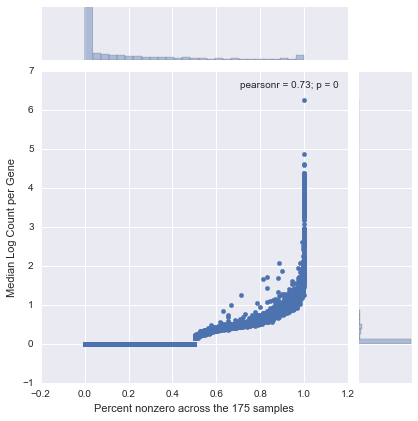

In [91]:
joint_df.columns = ['Percent nonzero across the {} samples'.format(exp.shape[1]), 'Median Log Count per Gene']
sns.jointplot(joint_df.columns[0], joint_df.columns[1], joint_df)
plt.show()

## Analysis of outputs

In [8]:
output_dir = '/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/network_inputs_and_outputs/outputs/dmel_TF_filtered_experiment'

In [9]:
first_last_folders = ['2018-03-06_14-21-10', '2018-03-06_17-42-47'] # ['2018-03-09_14-47-59', '2018-03-15_08-15-20']  # 
folders = os.listdir(output_dir)
relevant_folders = [i for i in sorted(folders) if (i >= first_last_folders[0]) & (i <= first_last_folders[1])]
relevant_folders

['2018-03-06_14-21-10',
 '2018-03-06_15-41-49',
 '2018-03-06_16-09-51',
 '2018-03-06_16-26-23',
 '2018-03-06_16-44-48',
 '2018-03-06_17-32-33',
 '2018-03-06_17-42-47']

In [10]:
# Generate networks
networks = {}
basename = 'cutoff_'
current_cutoff = .3
increment = .1
for i in relevant_folders:
    filename = os.path.join(os.path.join(output_dir, i), 'network.tsv')
    name = basename + str(current_cutoff)
    networks[name] = pd.read_csv(filename, sep='\t')
    current_cutoff += increment
    networks[name].head()
    


In [11]:
def convert_col_from_Fbgn_ids_to_symbols(col):
    new_col = [gene_id_to_sym[i] if i in gene_id_to_sym.keys() else i for i in col]
    return new_col

In [12]:
networks.keys()

['cutoff_0.6',
 'cutoff_0.7',
 'cutoff_0.4',
 'cutoff_0.5',
 'cutoff_0.3',
 'cutoff_0.8',
 'cutoff_0.9']

In [13]:
terminal_filament_specific_genes = ['glec', 'Gbp1', 'Dh44-R2', 'Mur89F', 'Dl', 'CG2852', 'ImpE1']

# Are they in the symbol list?
[t in gene_id_to_sym.values() for t in terminal_filament_specific_genes]

[True, True, True, True, True, True, True]

In [14]:
terminal_filament_specific_tfs = ['bab1','bab2', 'en']

# Are they in the symbol list?
[t in gene_id_to_sym.values() for t in terminal_filament_specific_tfs]

[True, True, True]

cutoff_0.3
    regulator target  beta.sign.sum  beta.non.zero
89        cwo     Dl           14.0           14.0
322        sc     Dl           10.0           10.0
    regulator   target  beta.sign.sum  beta.non.zero
189      bab1   CG5862           12.0           12.0
236        en      dco           11.0           11.0
271      bab1  CG17224           11.0           11.0


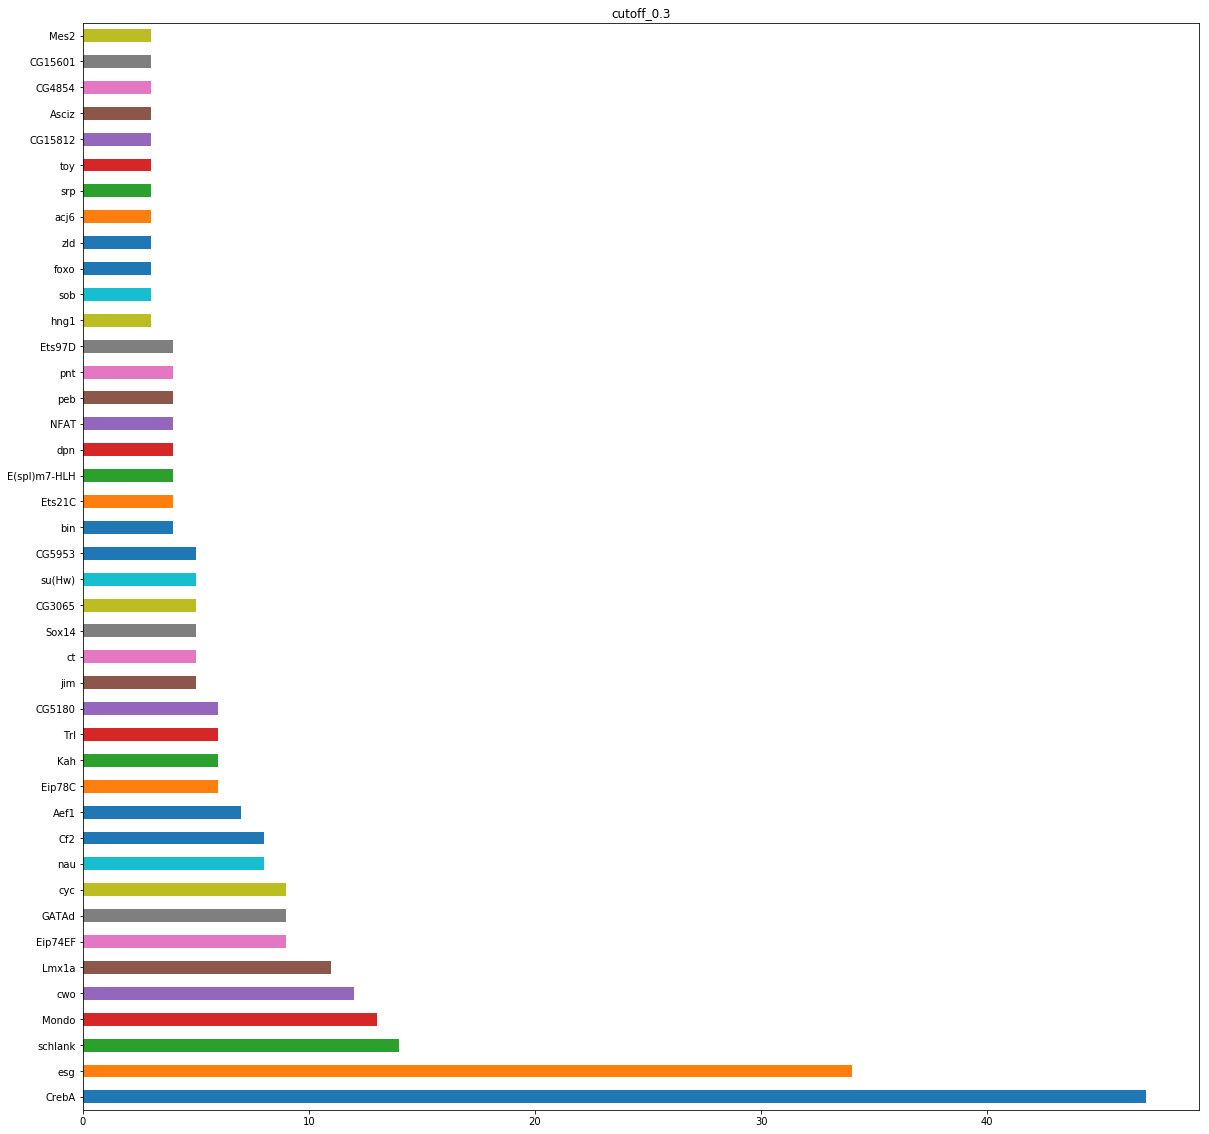

cutoff_0.4
        regulator  target  beta.sign.sum  beta.non.zero
52            cwo      Dl           16.0           16.0
199         CrebA    glec          -12.0           12.0
310  E(spl)m7-HLH  Mur89F           10.0           10.0
    regulator  target  beta.sign.sum  beta.non.zero
377      bab1  CG5862           10.0           10.0


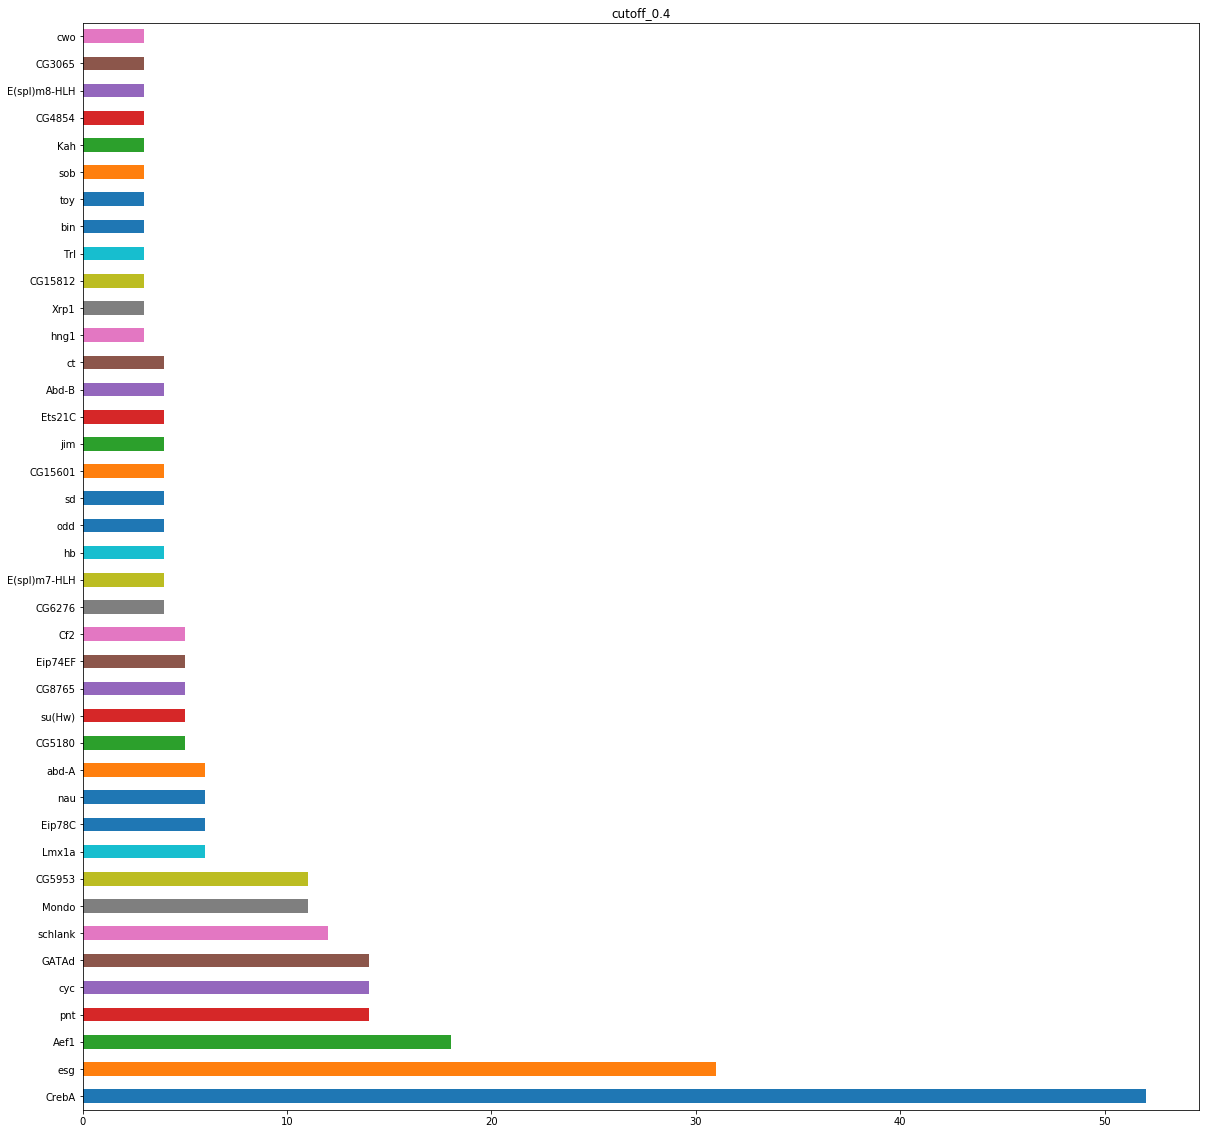

cutoff_0.5
    regulator target  beta.sign.sum  beta.non.zero
81        cwo     Dl           14.0           14.0
98        jim     Dl          -13.0           13.0
106        sc     Dl           13.0           13.0
    regulator   target  beta.sign.sum  beta.non.zero
114      bab1  CG17224           13.0           13.0
260        en      SF2           11.0           11.0
345      bab1   CG4511           10.0           10.0


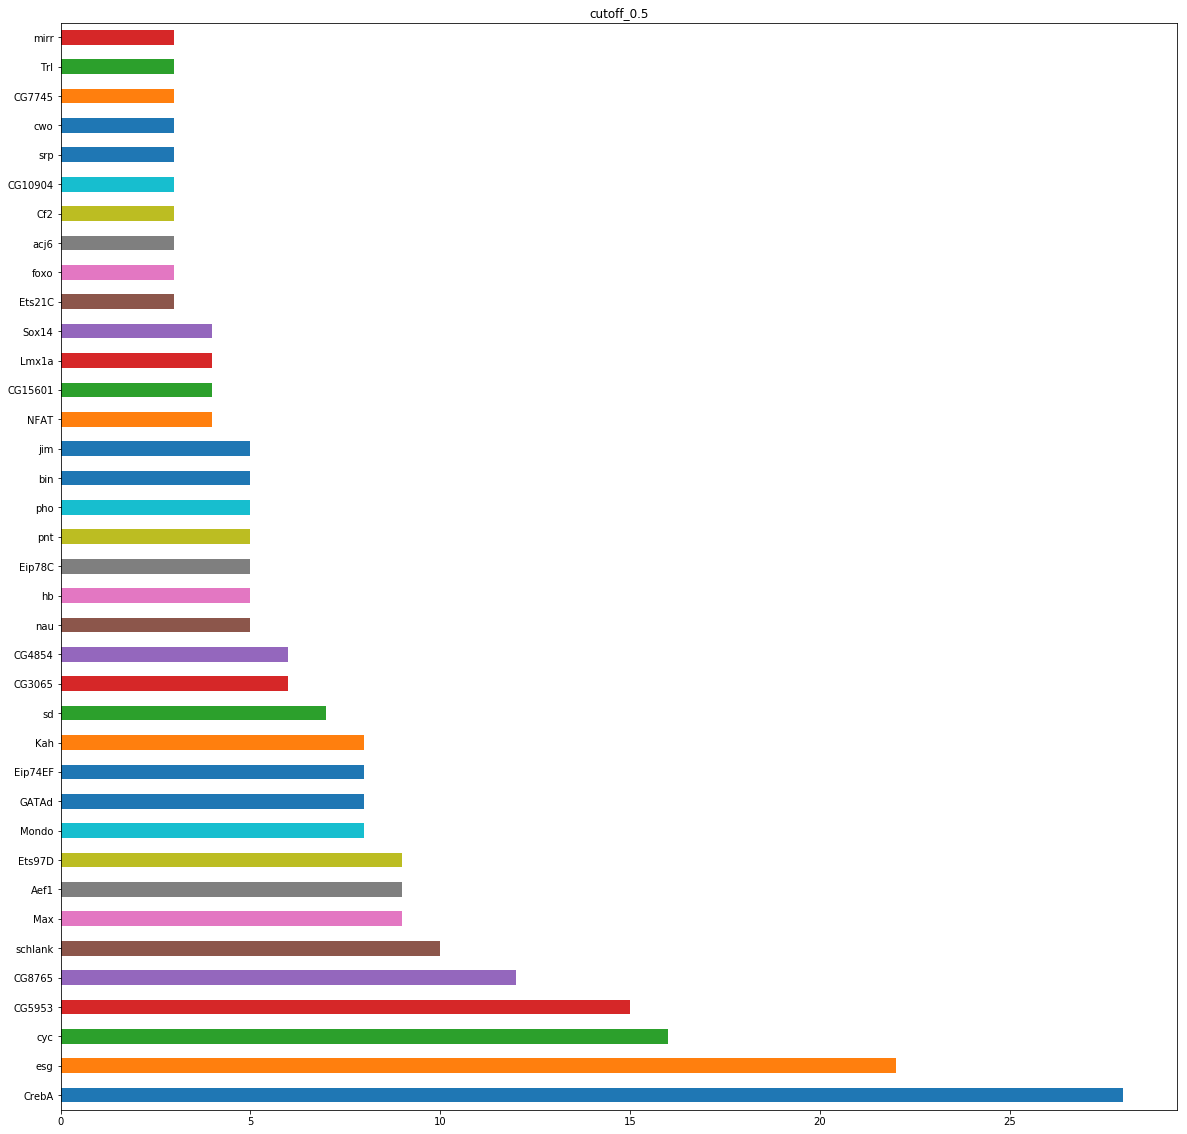

cutoff_0.6
    regulator  target  beta.sign.sum  beta.non.zero
61         sc      Dl           16.0           16.0
113     Sox14  Mur89F           14.0           14.0
246     CrebA    glec          -12.0           12.0
264       cwo      Dl           11.0           11.0
    regulator   target  beta.sign.sum  beta.non.zero
60         en      SF2           17.0           17.0
170        en    Orct2           13.0           13.0
335      bab1  Slc45-1           10.0           10.0
348      bab1  CG17224           10.0           10.0


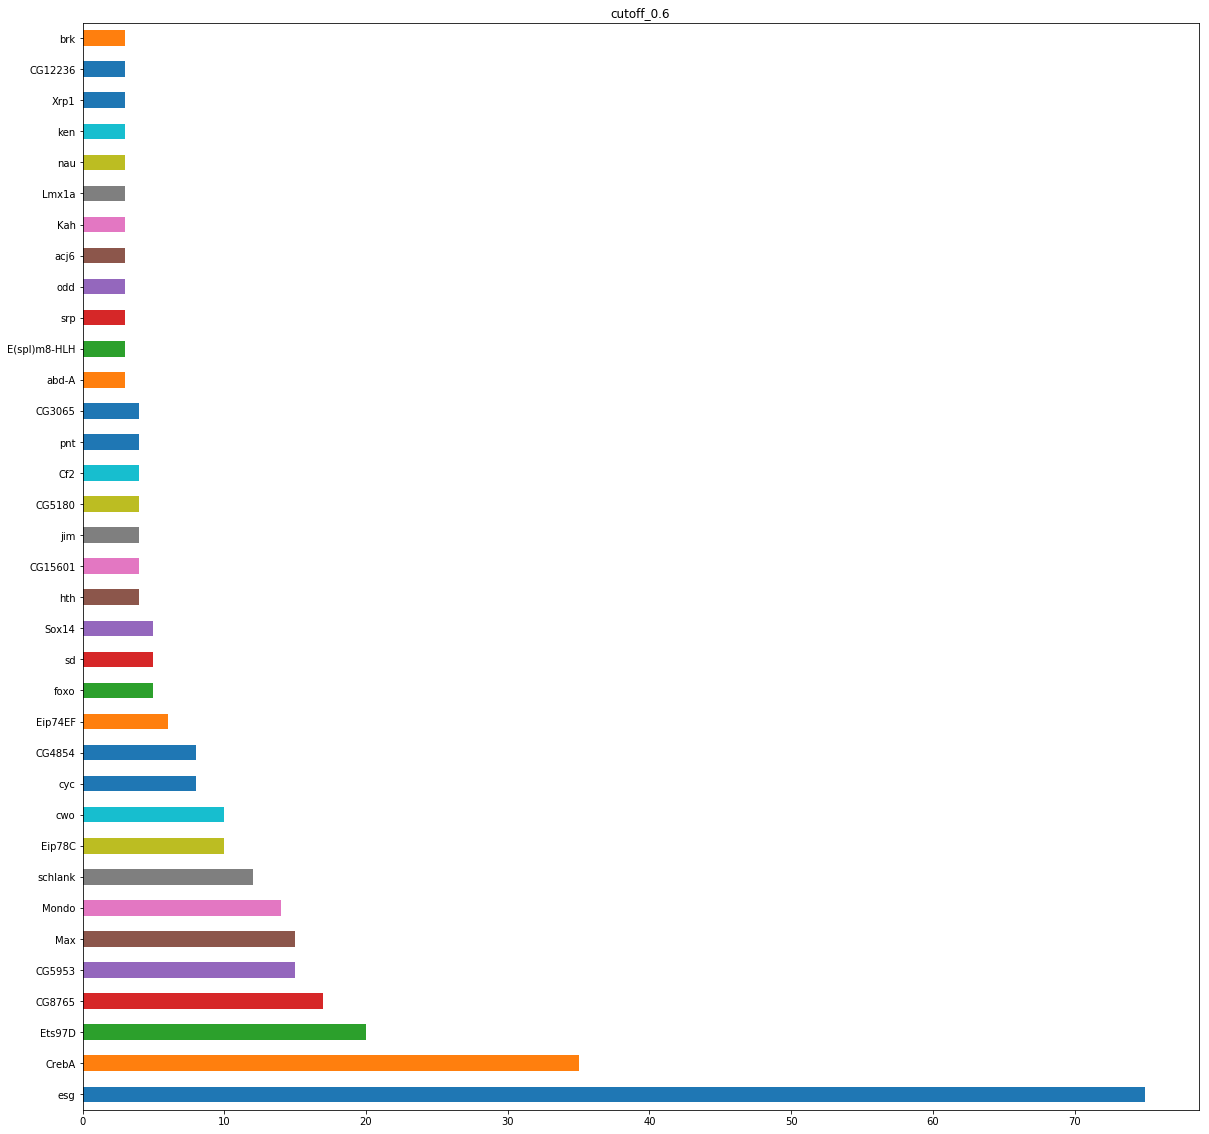

cutoff_0.7
    regulator  target  beta.sign.sum  beta.non.zero
35         sc      Dl           18.0           18.0
88      Sox14  Mur89F           15.0           15.0
163     CrebA    glec          -13.0           13.0
326     Mondo    glec           10.0           10.0
    regulator  target  beta.sign.sum  beta.non.zero
192      bab1  Tsp66E           12.0           12.0
233      bab1     ksh           11.0           11.0


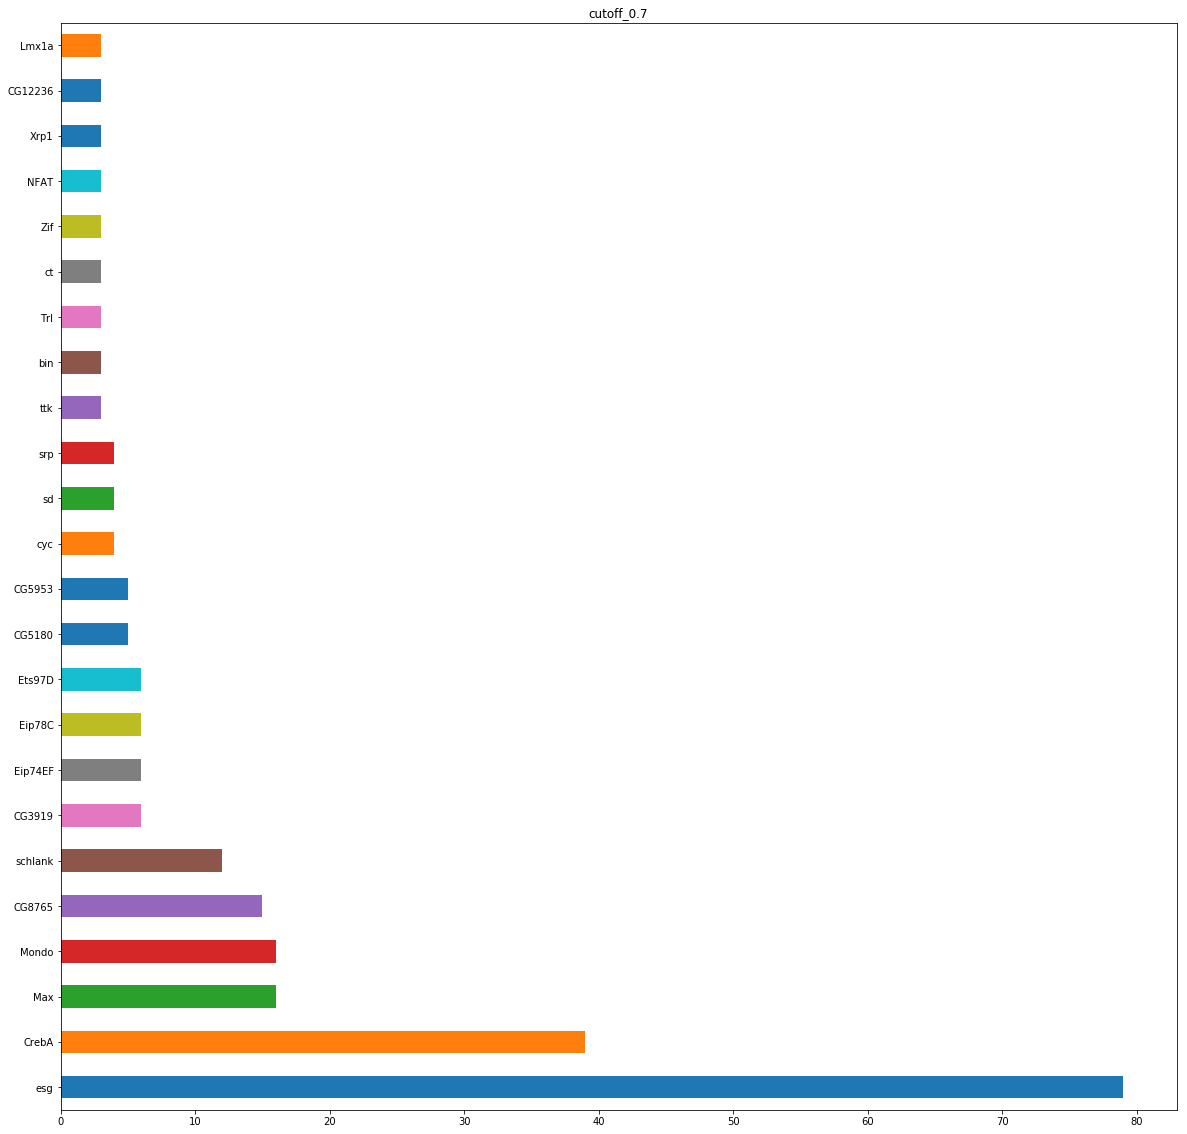

cutoff_0.8
    regulator  target  beta.sign.sum  beta.non.zero
140        sc      Dl           14.0           14.0
222    Ets97D    glec          -12.0           12.0
255       Hsf  Mur89F          -11.0           11.0
    regulator   target  beta.sign.sum  beta.non.zero
218        en      SF2           12.0           12.0
327      bab1  CG40228           10.0           10.0


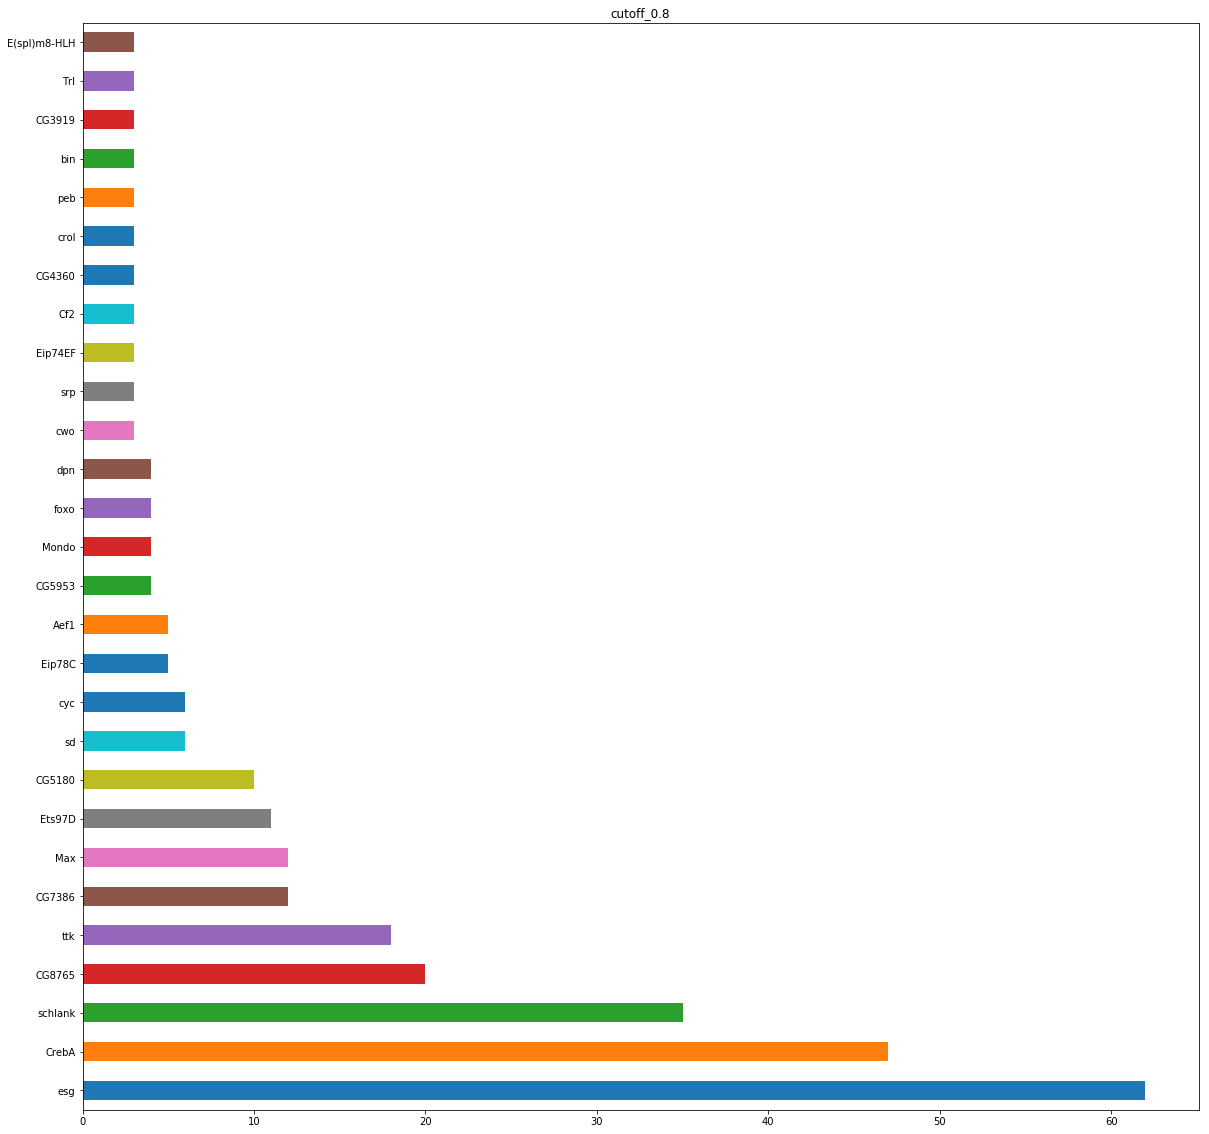

cutoff_0.9
    regulator target  beta.sign.sum  beta.non.zero
85     CG5953     Dl           15.0           15.0
216       Med     Dl          -11.0           11.0
223        sc     Dl           11.0           11.0
    regulator  target  beta.sign.sum  beta.non.zero
187      bab1  Act42A           12.0           12.0
282        en     SF2           10.0           10.0


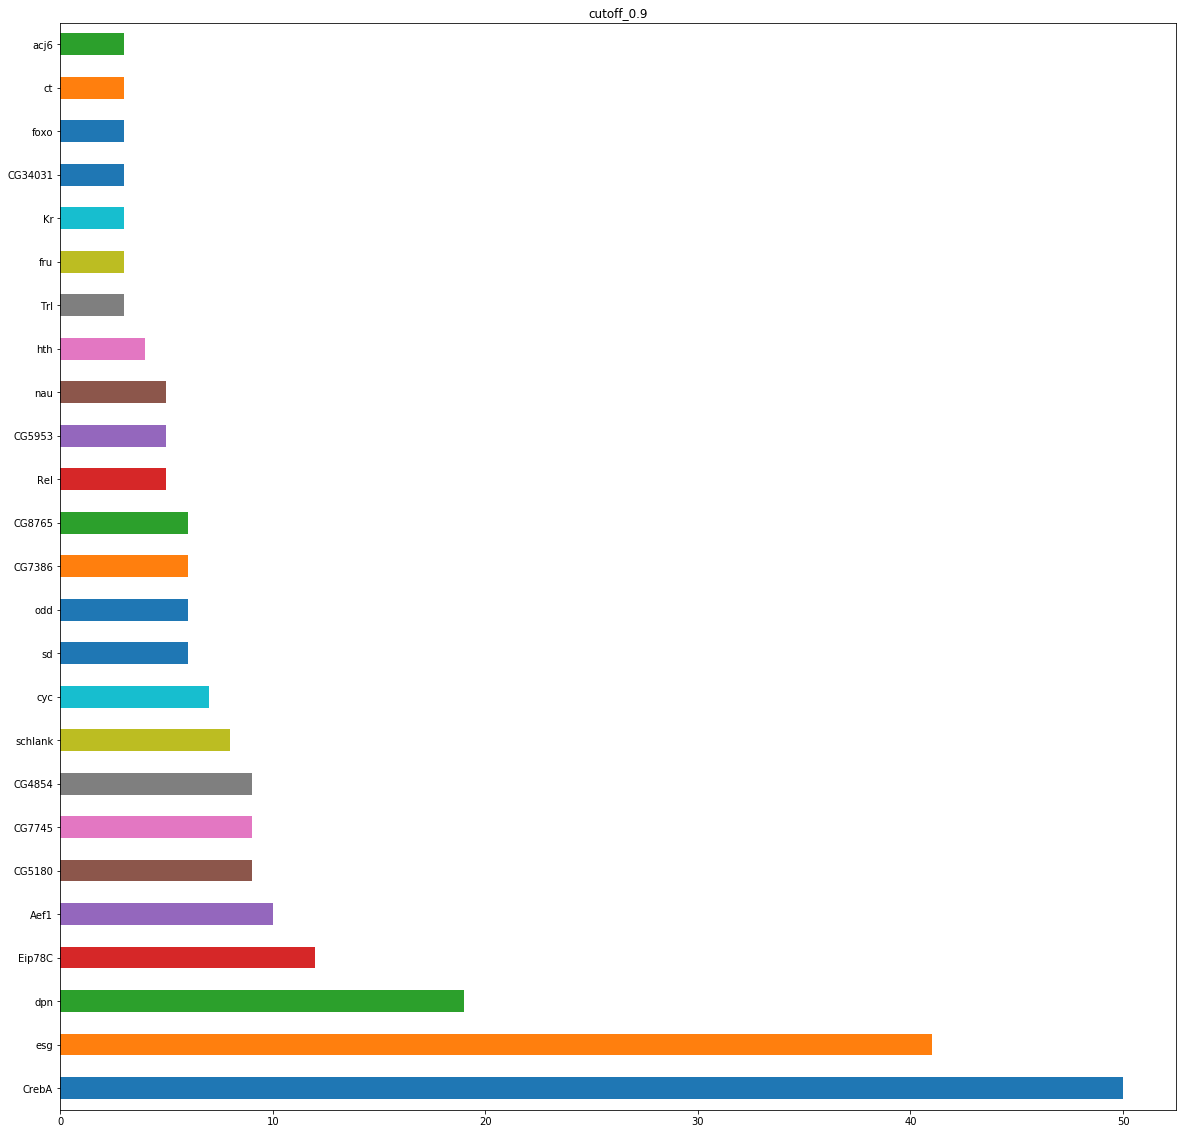

In [15]:
num_regulators = []
num_targets = []
num_edges = []
networks_symbols_high_conf = {}
for k in sorted(networks.keys()):
    plt.figure(figsize=(20,20))
    print k
    net = networks[k][networks[k]['beta.non.zero'] >= 10]
    networks_symbols_high_conf[k] = net.copy()
    networks_symbols_high_conf[k]['regulator'] = convert_col_from_Fbgn_ids_to_symbols(net['regulator'])
    networks_symbols_high_conf[k]['target'] = convert_col_from_Fbgn_ids_to_symbols(net['target'])
    regs = set(net['regulator'])
    targets = set(net['target'])    
    num_edges.append(net.shape[0])
    num_regulators.append(len(regs))
    num_targets.append(len(targets))
    some_cols = ['regulator', 'target', 'beta.sign.sum', 'beta.non.zero']
    print(networks_symbols_high_conf[k][some_cols][networks_symbols_high_conf[k]['target'].isin(terminal_filament_specific_genes)])
    print(networks_symbols_high_conf[k][some_cols][networks_symbols_high_conf[k]['regulator'].isin(terminal_filament_specific_tfs)])
    vals = networks_symbols_high_conf[k]['regulator'].value_counts()
    vals = vals[vals > 2]
    vals.plot(kind='barh')
    plt.title(k)
    plt.show()
    

In [38]:
vals = networks_symbols_high_conf['cutoff_0.6']['regulator'].value_counts()
vals = vals[vals > 2]

In [27]:
# Compute network similarity:
networks_symbols_high_conf

{'cutoff_0.3':     regulator      target  beta.sign.sum  beta.non.zero  var.exp.median  \
 0     CG15812     CR45018           20.0           20.0        0.235262   
 1       CrebA       ATP8B          -20.0           20.0        0.236279   
 2       CrebA     CG42389          -20.0           20.0        0.155248   
 3       CrebA         pum          -19.0           19.0        0.191750   
 4       Lmx1a         Eb1           19.0           19.0        0.155747   
 5       CrebA         Bsg          -19.0           19.0        0.179284   
 6       CrebA       RpS20           19.0           19.0        0.175433   
 7       CrebA        Timp          -19.0           19.0        0.178448   
 8         esg      REPTOR           19.0           19.0        0.141956   
 9         Trl        CadN           19.0           19.0        0.150278   
 10      CrebA     CG31808          -19.0           19.0        0.172863   
 11        esg      RpL18A           19.0           19.0        0.130109  

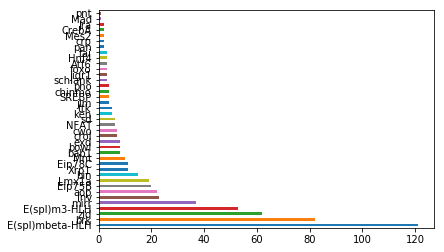

In [40]:
networks_symbols_high_conf['cutoff_0.6']['regulator'].value_counts().plot(kind='barh')

[Text(0,0,'cutoff_0.3'),
 Text(0,0,'cutoff_0.4'),
 Text(0,0,'cutoff_0.5'),
 Text(0,0,'cutoff_0.6'),
 Text(0,0,'cutoff_0.7'),
 Text(0,0,'cutoff_0.8'),
 Text(0,0,'cutoff_0.9')]

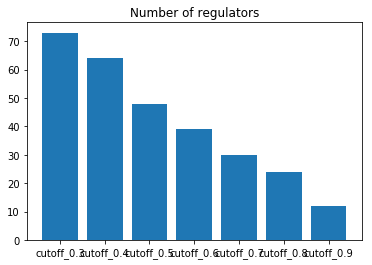

In [41]:
fig, ax = plt.subplots()
plt.title('Number of regulators')
ind = np.arange(1, 8)
ax.bar(ind, num_regulators)
ax.set_xticks(ind)
ax.set_xticklabels(sorted(networks.keys()))

In [42]:
[10 * i for i in np.arange(3,10)]

[30, 40, 50, 60, 70, 80, 90]

<BarContainer object of 7 artists>

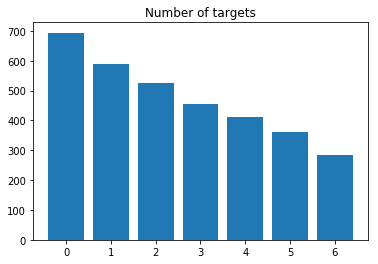

In [43]:
plt.title('Number of targets')
plt.bar(range(7), num_targets, align='center')

<BarContainer object of 7 artists>

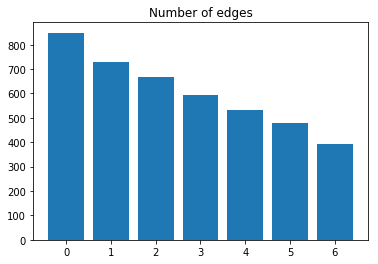

In [44]:
plt.title('Number of edges')
plt.bar(range(7), num_edges, align='center')

In [45]:
## Compare to marbach gold standard

In [23]:
fname = '~/Dev/Drosophila_inferelator/Marbach_gold_standard.tsv'
sup_table = pd.read_csv(fname, sep='\t', index_col = 0)
sup_table.head()

,FBgn0038979,FBgn0038978,FBgn0014018,FBgn0014931,FBgn0026869,FBgn0052121,FBgn0010433,FBgn0015014,FBgn0037620,FBgn0037621,...,FBgn0037876,FBgn0011655,FBgn0039227,FBgn0011656,FBgn0035238,FBgn0029928,FBgn0040366,FBgn0029920,FBgn0045852,FBgn0022935
FBgn0014931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0014930,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0035367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0027562,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0035031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
np.max(prior_gs.sum())

4663.0

In [62]:
prior_gs.shape

(4804, 328)

In [7]:
fname = '~/Dev/Drosophila_inferelator/Marbach_tf_names.tsv'
sup_table.head(1).to_csv(fname, sep='\t')

In [67]:
# Compare to DAM-ID and binding site
# fname = '/Users/ndeveaux/Dev/Drosophila_inferelator/priors_from_cluster/3_samples_merged_intersected_with_1kb_tss/priors.tsv'
fname = '/Users/ndeveaux/Dev/Drosophila_inferelator/priors_from_cluster/3_samples_merged_intersected_with_introns/priors.tsv'
sup_table = pd.read_csv(fname, sep='\t', index_col = 0)
sup_table.head()

,FBgn0015239,FBgn0086680,FBgn0004396,FBgn0004652,FBgn0004394,FBgn0001147,FBgn0004837,FBgn0011723,FBgn0000576,FBgn0010433,...,FBgn0000462,FBgn0000459,FBgn0001983,FBgn0054031,FBgn0031573,FBgn0003145,FBgn0000014,FBgn0000659,FBgn0015561,FBgn0000546
FBgn0036752,0,2,0,0,2,0,0,0,4,0,...,0,0,0,4,0,0,4,0,4,0
FBgn0037338,0,0,0,1,0,0,1,1,0,2,...,0,1,0,0,0,0,0,0,0,0
FBgn0036202,2,8,0,8,2,0,0,2,0,2,...,4,0,6,0,2,8,0,0,0,0
FBgn0033988,3,13,6,8,8,3,3,5,20,29,...,9,10,17,12,10,15,21,8,10,6
FBgn0263599,0,0,1,1,0,0,0,0,0,0,...,2,3,0,1,1,0,0,0,0,0


In [68]:
# replace with zero or 1
prior_gs = sup_table[sup_table == 0]
prior_gs = prior_gs.fillna(1.0)
prior_gs.head()

,FBgn0015239,FBgn0086680,FBgn0004396,FBgn0004652,FBgn0004394,FBgn0001147,FBgn0004837,FBgn0011723,FBgn0000576,FBgn0010433,...,FBgn0000462,FBgn0000459,FBgn0001983,FBgn0054031,FBgn0031573,FBgn0003145,FBgn0000014,FBgn0000659,FBgn0015561,FBgn0000546
FBgn0036752,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
FBgn0037338,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0036202,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
FBgn0033988,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
FBgn0263599,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# DENSITY?
prior_gs.sum().sum() / float(prior_gs.shape[0] * prior_gs.shape[1])

0.55379700290800293

In [51]:
float(prior_gs.shape[0] * prior_gs.shape[1])

1575712.0

In [48]:
def calc_and_plot_precision_and_recall(k, net, filtered_gs):
    total_marbach_entries = filtered_gs.sum().sum()
    non_overlapping = 0
    recovered_count = 0
    precision = []
    recall = []
    count = 0
    for (idx, row) in net.iterrows():
        tf = row['regulator']
        target = row['target']
        if tf not in filtered_gs.columns or target not in filtered_gs.index:
            non_overlapping += 1
        else:
            count += 1
            if filtered_gs.loc[target, tf] == 1:
                recovered_count += 1
            precision.append(recovered_count / float(count))
            recall.append(recovered_count / total_marbach_entries)
    expected_random_precision = total_marbach_entries / float(filtered_gs.shape[0] * filtered_gs.shape[1])
    print expected_random_precision
    plt.plot(recall, precision)
    plt.ylim(ymax=.9, ymin=.3) 
    plt.axhline(y=expected_random_precision, color='r', linestyle='-')
    title = '{} : Recall and Precision against a filtered GS of size {} by {} with {} entries'.format(k, filtered_gs.shape[0], filtered_gs.shape[1], int(total_marbach_entries))
    plt.title(title)
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.show()

In [33]:
set(net['target']).intersection(prior_gs.index)

{'FBgn0000042',
 'FBgn0000043',
 'FBgn0000053',
 'FBgn0000064',
 'FBgn0000097',
 'FBgn0000100',
 'FBgn0000116',
 'FBgn0000117',
 'FBgn0000150',
 'FBgn0000181',
 'FBgn0000253',
 'FBgn0000259',
 'FBgn0000426',
 'FBgn0000568',
 'FBgn0000575',
 'FBgn0000579',
 'FBgn0000658',
 'FBgn0001085',
 'FBgn0001092',
 'FBgn0001098',
 'FBgn0001105',
 'FBgn0001149',
 'FBgn0001215',
 'FBgn0001225',
 'FBgn0001248',
 'FBgn0001316',
 'FBgn0001942',
 'FBgn0002284',
 'FBgn0002526',
 'FBgn0002543',
 'FBgn0002579',
 'FBgn0002780',
 'FBgn0002921',
 'FBgn0003165',
 'FBgn0003274',
 'FBgn0003279',
 'FBgn0003360',
 'FBgn0003371',
 'FBgn0003415',
 'FBgn0003435',
 'FBgn0003502',
 'FBgn0003884',
 'FBgn0004167',
 'FBgn0004362',
 'FBgn0004363',
 'FBgn0004370',
 'FBgn0004403',
 'FBgn0004404',
 'FBgn0004432',
 'FBgn0004587',
 'FBgn0004644',
 'FBgn0004646',
 'FBgn0004656',
 'FBgn0004687',
 'FBgn0004838',
 'FBgn0004870',
 'FBgn0004876',
 'FBgn0004907',
 'FBgn0004926',
 'FBgn0005533',
 'FBgn0005585',
 'FBgn0005640',
 'FBgn00

0.600250524748


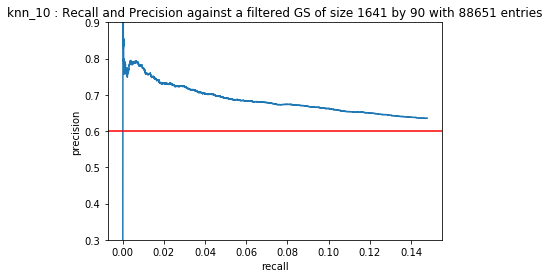

0.600250524748


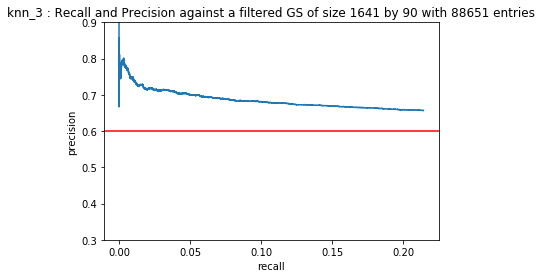

0.600250524748


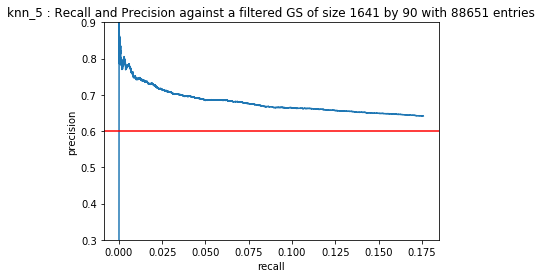

0.600250524748


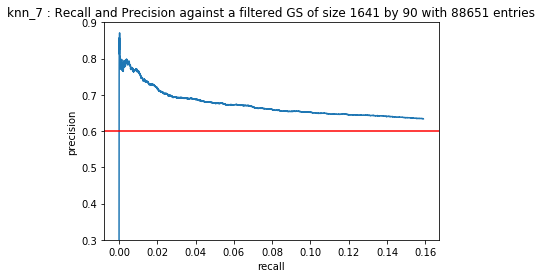

In [70]:
for k in sorted(networks.keys()):
    net = networks[k]
    filtered_gs = prior_gs.loc[set(net['target']).intersection(prior_gs.index), set(net['regulator']).intersection(prior_gs.columns)]
    # Percentage of our network that overlaps with Marbach
    calc_and_plot_precision_and_recall(k, net, filtered_gs)

In [32]:
net

,regulator,target,beta.sign.sum,beta.non.zero,var.exp.median,combined_confidences,prior
27,FBgn0038852,FBgn0032774,60.0,60.0,0.720790,0.999563,0.0
30,FBgn0002735,FBgn0086711,60.0,60.0,0.600204,0.999254,0.0
63,FBgn0259234,FBgn0033351,-59.0,59.0,0.403595,0.981661,0.0
58,FBgn0003300,FBgn0025809,59.0,59.0,0.601988,0.982325,0.0
59,FBgn0038852,FBgn0038492,59.0,59.0,0.507262,0.982164,0.0
64,FBgn0016076,FBgn0011591,-59.0,59.0,0.394478,0.981643,0.0
46,FBgn0000964,FBgn0030306,-59.0,59.0,0.872560,0.983190,0.0
77,FBgn0003866,FBgn0000567,58.0,58.0,0.469943,0.965156,0.0
83,FBgn0003300,FBgn0031713,58.0,58.0,0.296945,0.963830,0.0
97,FBgn0034534,FBgn0028648,57.0,57.0,0.497364,0.948563,0.0


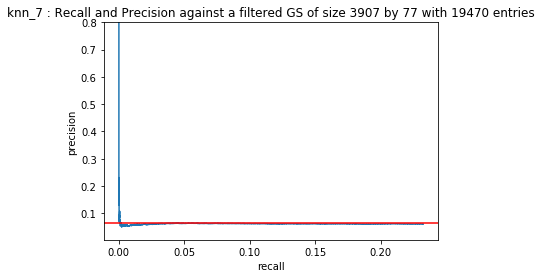

In [200]:
net = inters[0:100000]
filtered_gs = sup_table.loc[set(net['target']).intersection(sup_table.index), set(net['regulator']).intersection(sup_table.columns)]
# Percentage of our network that overlaps with Marbach
calc_and_plot_precision_and_recall(k, net, filtered_gs)

In [192]:
net.shape

(100, 7)

In [59]:
top_interactions.index

MultiIndex(levels=[[u'FBgn0000014', u'FBgn0000097', u'FBgn0000370', u'FBgn0000504', u'FBgn0000546', u'FBgn0000567', u'FBgn0000568', u'FBgn0000577', u'FBgn0000611', u'FBgn0001078', u'FBgn0001185', u'FBgn0001222', u'FBgn0001269', u'FBgn0001291', u'FBgn0001297', u'FBgn0001994', u'FBgn0002521', u'FBgn0002609', u'FBgn0002633', u'FBgn0002723', u'FBgn0002733', u'FBgn0003118', u'FBgn0003345', u'FBgn0003396', u'FBgn0003567', u'FBgn0003870', u'FBgn0003964', u'FBgn0004396', u'FBgn0004652', u'FBgn0004837', u'FBgn0004859', u'FBgn0004865', u'FBgn0004870', u'FBgn0004893', u'FBgn0004914', u'FBgn0005612', u'FBgn0011236', u'FBgn0011648', u'FBgn0011655', u'FBgn0013263', u'FBgn0013799', u'FBgn0014018', u'FBgn0014343', u'FBgn0015239', u'FBgn0016076', u'FBgn0017578', u'FBgn0020309', u'FBgn0022935', u'FBgn0023094', u'FBgn0023215', u'FBgn0024250', u'FBgn0024321', u'FBgn0027339', u'FBgn0029957', u'FBgn0030432', u'FBgn0030505', u'FBgn0030673', u'FBgn0030899', u'FBgn0032130', u'FBgn0032223', u'FBgn0032587', u'FB

In [42]:
networks.keys()

['knn_3']

In [40]:
sup_table

,FBgn0038979,FBgn0038978,FBgn0014018,FBgn0014931,FBgn0026869,FBgn0052121,FBgn0010433,FBgn0015014,FBgn0037620,FBgn0037621,...,FBgn0037876,FBgn0011655,FBgn0039227,FBgn0011656,FBgn0035238,FBgn0029928,FBgn0040366,FBgn0029920,FBgn0045852,FBgn0022935
FBgn0014931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0014930,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0035367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0027562,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0035031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0027560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0027561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0036173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0027567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0027564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
net = inters
filtered_gs = sup_table.loc[set(net['target']).intersection(sup_table.index), set(net['regulator']).intersection(sup_table.columns)]
# Percentage of our network that overlaps with Marbach
# calc_and_plot_precision_and_recall(k, net, filtered_gs)
presences = []
for (idx, row) in net.iterrows():
    presence = 'No'
    if row['regulator'] not in filtered_gs.columns:
        presence = 'NA: regulator not in Marbach columns'
    if row['target'] not in filtered_gs.index:
        new_str = 'NA: target not in Marbach rows'
        if presence == 'No':
            presence = new_str
        else:
            presence = presence + '; ' + new_str
    if presence == 'No':
        if filtered_gs.loc[row['target'], row['regulator']] == 1:
            presence = 'Yes'
    presences.append(presence)

In [104]:
net['Marbach'] = presences

In [105]:
net.head()

,regulator,target,beta.sign.sum,beta.non.zero,var.exp.median,combined_confidences,prior,Marbach
0,FBgn0002609,FBgn0002592,80.0,80.0,3.555009,3.999614,4.0,Yes
1,FBgn0259789,FBgn0023129,80.0,80.0,2.493521,3.983658,4.0,No
2,FBgn0000097,FBgn0003415,80.0,80.0,3.088663,3.994001,4.0,Yes
3,FBgn0004652,FBgn0267727,79.0,79.0,1.967697,3.915342,4.0,NA: regulator not in Marbach columns; NA: targ...
4,FBgn0000577,FBgn0041630,79.0,79.0,1.888065,3.916648,4.0,No


In [106]:
net['regulator_symbol'] = convert_col_from_Fbgn_ids_to_symbols(net['regulator'])
net['target_symbol'] = convert_col_from_Fbgn_ids_to_symbols(net['target'])
    

In [107]:
net.to_csv("inferelator_network_Marbach_compared_shared_across_knn_3_5_7_10.tsv", sep='\t')

In [49]:
# Compare to each other: how self similar?
similarity_matrix = pd.DataFrame(np.zeros([len(networks), len(networks)]))
similarity_matrix.index = sorted(networks.keys())
similarity_matrix.columns = sorted(networks.keys())    
for k in sorted(networks.keys()):
    print k
    for (idx, row) in networks_symbols_high_conf[k].iterrows():
        src = row['regulator']
        trgt = row['target']
        for j in sorted(networks.keys()):
            if networks_symbols_high_conf[j][(networks_symbols_high_conf[j]['regulator'] == src) & (networks_symbols_high_conf[j]['target'] == trgt)].shape[0] > 0:
                similarity_matrix.loc[j, k] += 1
    

cutoff_0.3
cutoff_0.4
cutoff_0.5
cutoff_0.6
cutoff_0.7
cutoff_0.8
cutoff_0.9


In [50]:
similarity_matrix 

,cutoff_0.3,cutoff_0.4,cutoff_0.5,cutoff_0.6,cutoff_0.7,cutoff_0.8,cutoff_0.9
cutoff_0.3,849.0,633.0,506.0,425.0,347.0,295.0,105.0
cutoff_0.4,633.0,728.0,573.0,479.0,378.0,321.0,120.0
cutoff_0.5,506.0,573.0,667.0,534.0,418.0,353.0,132.0
cutoff_0.6,425.0,479.0,534.0,592.0,446.0,377.0,137.0
cutoff_0.7,347.0,378.0,418.0,446.0,534.0,440.0,158.0
cutoff_0.8,295.0,321.0,353.0,377.0,440.0,480.0,172.0
cutoff_0.9,105.0,120.0,132.0,137.0,158.0,172.0,391.0


Text(0.5,1,'Similarity Matrix: How many entries in common?')

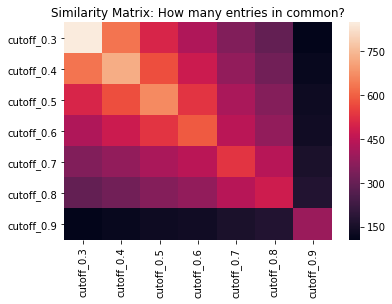

In [51]:
sns.heatmap(similarity_matrix)
plt.title('Similarity Matrix: How many entries in common?')

In [52]:
percentage_similarity_matrix = similarity_matrix / num_edges

In [53]:
percentage_similarity_matrix

,cutoff_0.3,cutoff_0.4,cutoff_0.5,cutoff_0.6,cutoff_0.7,cutoff_0.8,cutoff_0.9
cutoff_0.3,1.000000,0.869505,0.758621,0.717905,0.649813,0.614583,0.268542
cutoff_0.4,0.745583,1.000000,0.859070,0.809122,0.707865,0.668750,0.306905
cutoff_0.5,0.595995,0.787088,1.000000,0.902027,0.782772,0.735417,0.337596
cutoff_0.6,0.500589,0.657967,0.800600,1.000000,0.835206,0.785417,0.350384
cutoff_0.7,0.408716,0.519231,0.626687,0.753378,1.000000,0.916667,0.404092
cutoff_0.8,0.347468,0.440934,0.529235,0.636824,0.823970,1.000000,0.439898
cutoff_0.9,0.123675,0.164835,0.197901,0.231419,0.295880,0.358333,1.000000


Text(0.5,1,'percentage similar')

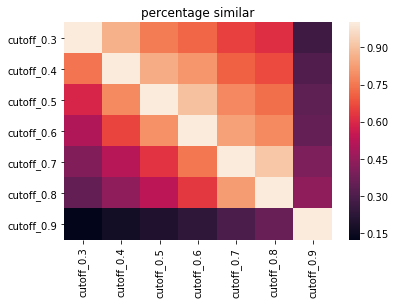

In [54]:
sns.heatmap(percentage_similarity_matrix)
plt.title('percentage similar')

In [55]:
def get_symbol(fbgn_id):
    if fbgn_id in gene_id_to_sym.keys():
        return gene_id_to_sym[fbgn_id]
    return fbgn_id

In [47]:
## Send to gephi outputs:
for k in networks_symbols_high_conf:
    to_gephi_net = networks_symbols_high_conf[k].copy()
    to_gephi_net['Target'] = [get_symbol(i) for i in to_gephi_net['target']]
    to_gephi_net['Source'] = [get_symbol(i) for i in to_gephi_net['regulator']]
    to_gephi_net = to_gephi_net.drop(['target', 'regulator'], axis=1)
    to_gephi_net.to_csv(os.path.join(output_dir, '{}_to_gephi_network.tsv'.format(k)), sep='\t', index_col=0, index=False)

In [48]:
networks_symbols_high_conf.keys()

['cutoff_0.6',
 'cutoff_0.7',
 'cutoff_0.4',
 'cutoff_0.5',
 'cutoff_0.3',
 'cutoff_0.8',
 'cutoff_0.9']

## New Analysis of KNN Smoothed outputs

In [52]:
output_dir = '/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/network_inputs_and_outputs/outputs/WtJ_and_WtF_KNN_Smoothed_data'  # dmel_TF_filtered_experiment'

In [53]:
first_last_folders =   ['2018-03-27_16-24-05', '2018-03-28_16-19-38'] 
folders = os.listdir(output_dir)
relevant_folders = [i for i in sorted(folders) if (i >= first_last_folders[0]) & (i <= first_last_folders[1])]
relevant_folders


['2018-03-27_16-24-05',
 '2018-03-28_12-57-21',
 '2018-03-28_13-49-36',
 '2018-03-28_16-19-38']

In [54]:
# Generate networks
networks = {}
basename = 'knn_'
knns = [10, 7, 5, 3]
for idx, i in enumerate(relevant_folders):
    filename = os.path.join(os.path.join(output_dir, i), 'network.tsv')
    name = basename + str(knns[idx])
    networks[name] = pd.read_csv(filename, sep='\t')
    networks[name].head()
    


knn_10
     regulator   target  beta.sign.sum  beta.non.zero
416        inv  Dh44-R2           59.0           59.0
1466       inv       Dl           52.0           52.0
1933    Eip78C  Dh44-R2           49.0           49.0
1990       exd     glec           49.0           49.0
2089    Eip78C     Gbp1           48.0           48.0
2284    Eip75B    ImpE1           47.0           47.0
2821      mirr     Gbp1           44.0           44.0
3717     Lmx1a     Gbp1           39.0           39.0
3906       exd   CG2852           38.0           38.0
4209       brk   Mur89F           37.0           37.0
5599        ci    ImpE1           32.0           32.0
5853      Atf6  Dh44-R2           31.0           31.0
6130       crp   CG2852           30.0           30.0
     regulator               target  beta.sign.sum  beta.non.zero
28        bab1                 Rsf1           60.0           60.0
46        bab1               CG9932           60.0           60.0
61        bab1                 LanA    

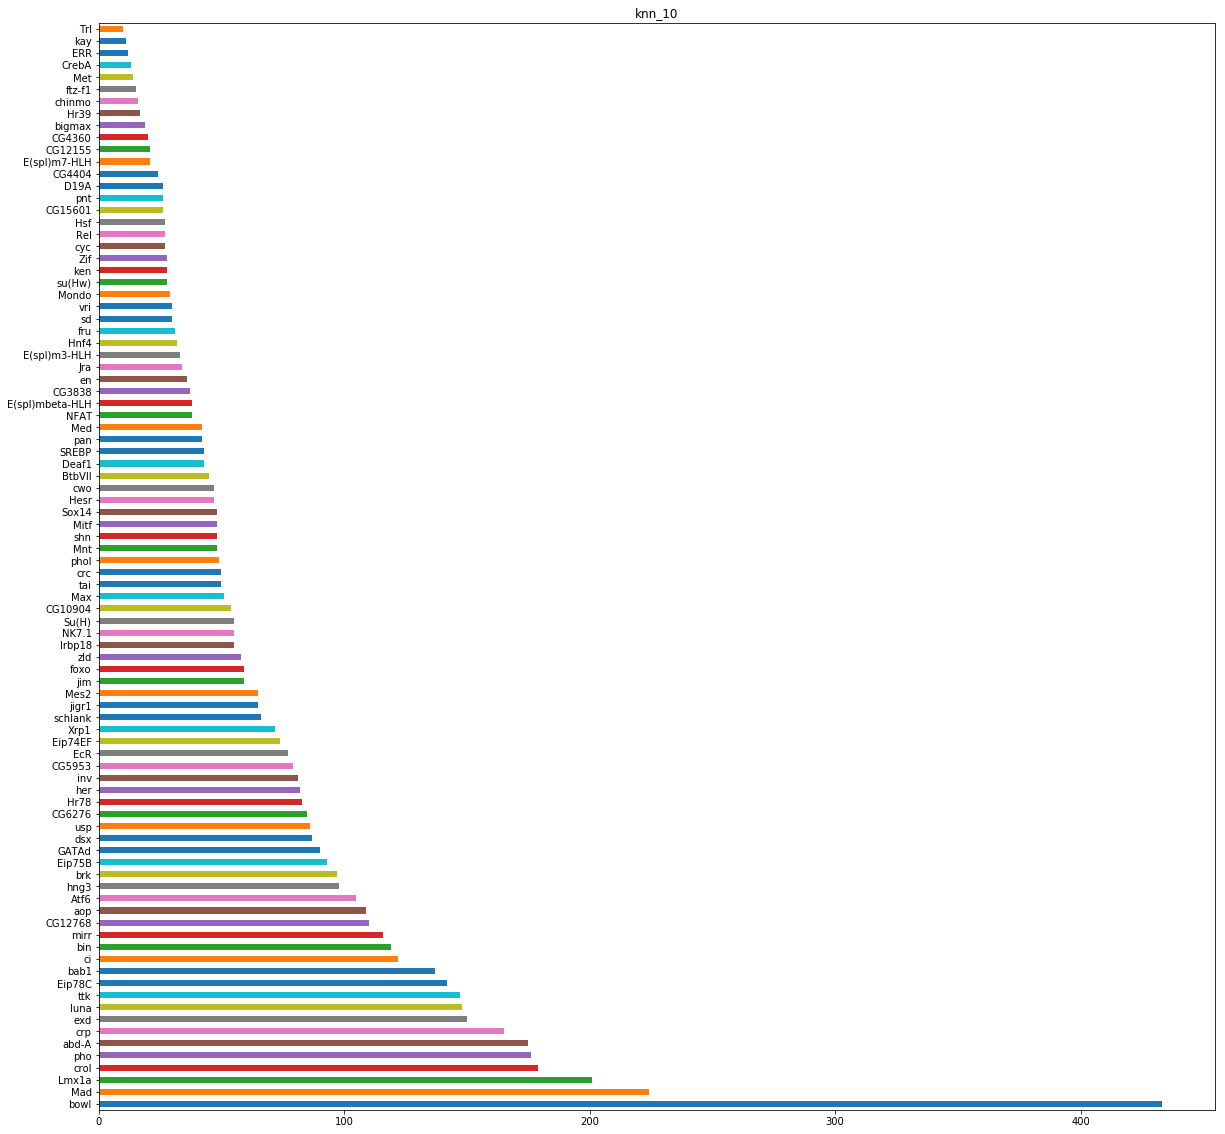

knn_3
            regulator   target  beta.sign.sum  beta.non.zero
340            Eip78C    ImpE1           56.0           56.0
562               brk   Mur89F           53.0           53.0
890             Lmx1a     Gbp1           50.0           50.0
1223  E(spl)mbeta-HLH       Dl          -47.0           47.0
2282              jim   CG2852           40.0           40.0
2293              inv  Dh44-R2           40.0           40.0
2345              tai       Dl           40.0           40.0
2683           Eip75B    ImpE1           38.0           38.0
3097              brk       Dl           36.0           36.0
3724           Eip78C     Gbp1           33.0           33.0
4000              aop   CG2852           32.0           32.0
4618             hng3   CG2852           30.0           30.0
     regulator     target  beta.sign.sum  beta.non.zero
16        bab1       Rsf1           60.0           60.0
29        bab1       LanA           60.0           60.0
34        bab1    CG10340        

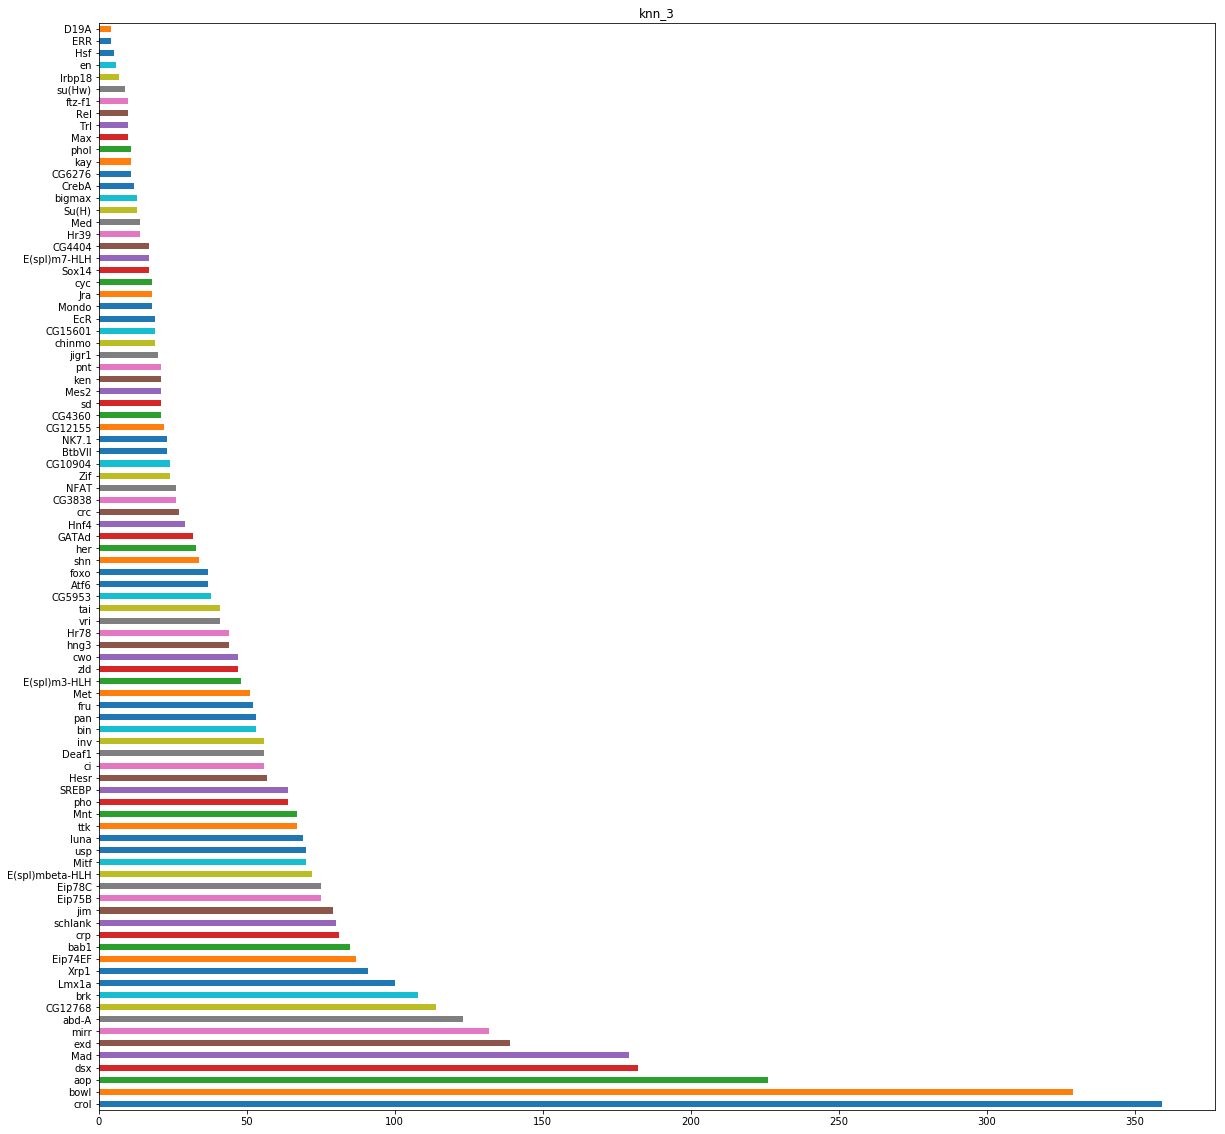

knn_5
     regulator   target  beta.sign.sum  beta.non.zero
552     Eip75B    ImpE1           56.0           56.0
776        inv   Mur89F           54.0           54.0
1101       inv  Dh44-R2           51.0           51.0
1142    Eip78C  Dh44-R2           51.0           51.0
2162      mirr     Gbp1           44.0           44.0
2456    Eip78C   CG2852           42.0           42.0
2476       inv       Dl           42.0           42.0
2695       brk   Mur89F           41.0           41.0
3419      bowl     Gbp1           37.0           37.0
3698       tai       Dl           36.0           36.0
4423       inv     glec           33.0           33.0
5407       exd     glec           30.0           30.0
     regulator               target  beta.sign.sum  beta.non.zero
11        bab1                 Rsf1           60.0           60.0
24        bab1               CG9932           60.0           60.0
101       bab1              CG18600           60.0           60.0
104       bab1              

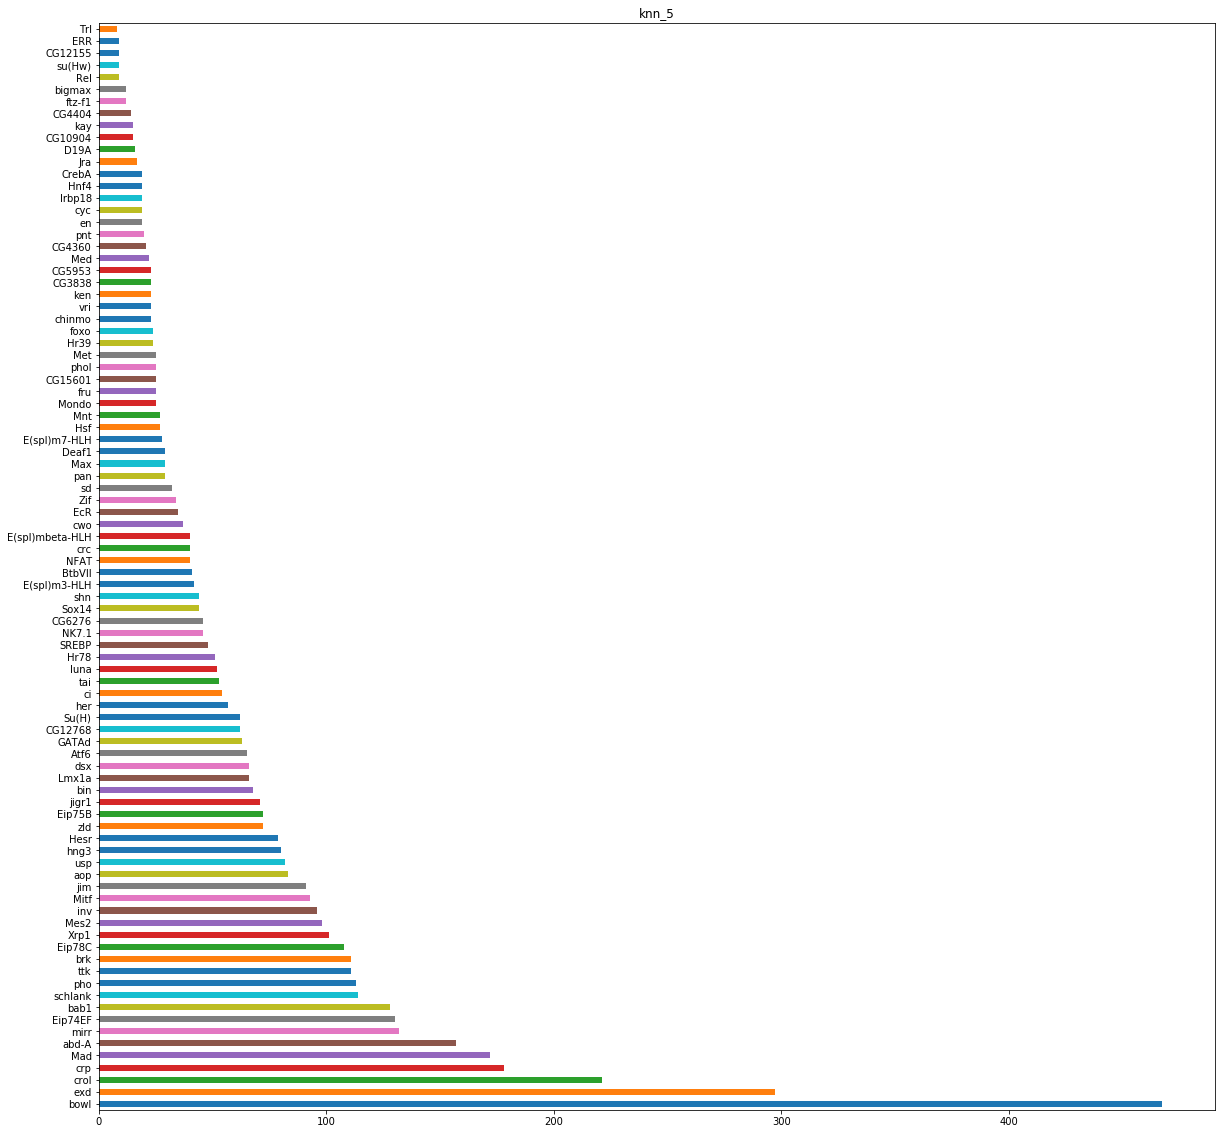

knn_7
            regulator   target  beta.sign.sum  beta.non.zero
507               inv     glec           57.0           57.0
917               inv  Dh44-R2           53.0           53.0
1207           Eip78C  Dh44-R2           51.0           51.0
1326            Lmx1a     Gbp1           50.0           50.0
1499            Lmx1a     glec           49.0           49.0
1870              aop   CG2852           46.0           46.0
1871  E(spl)mbeta-HLH       Dl          -46.0           46.0
3167           Eip78C     Gbp1           39.0           39.0
3440              jim       Dl           38.0           38.0
4076              brk   Mur89F           35.0           35.0
4303           Eip75B    ImpE1           34.0           34.0
4387            Lmx1a    ImpE1           34.0           34.0
4593             mirr     Gbp1           33.0           33.0
5581              crc     glec           30.0           30.0
     regulator               target  beta.sign.sum  beta.non.zero
19        bab

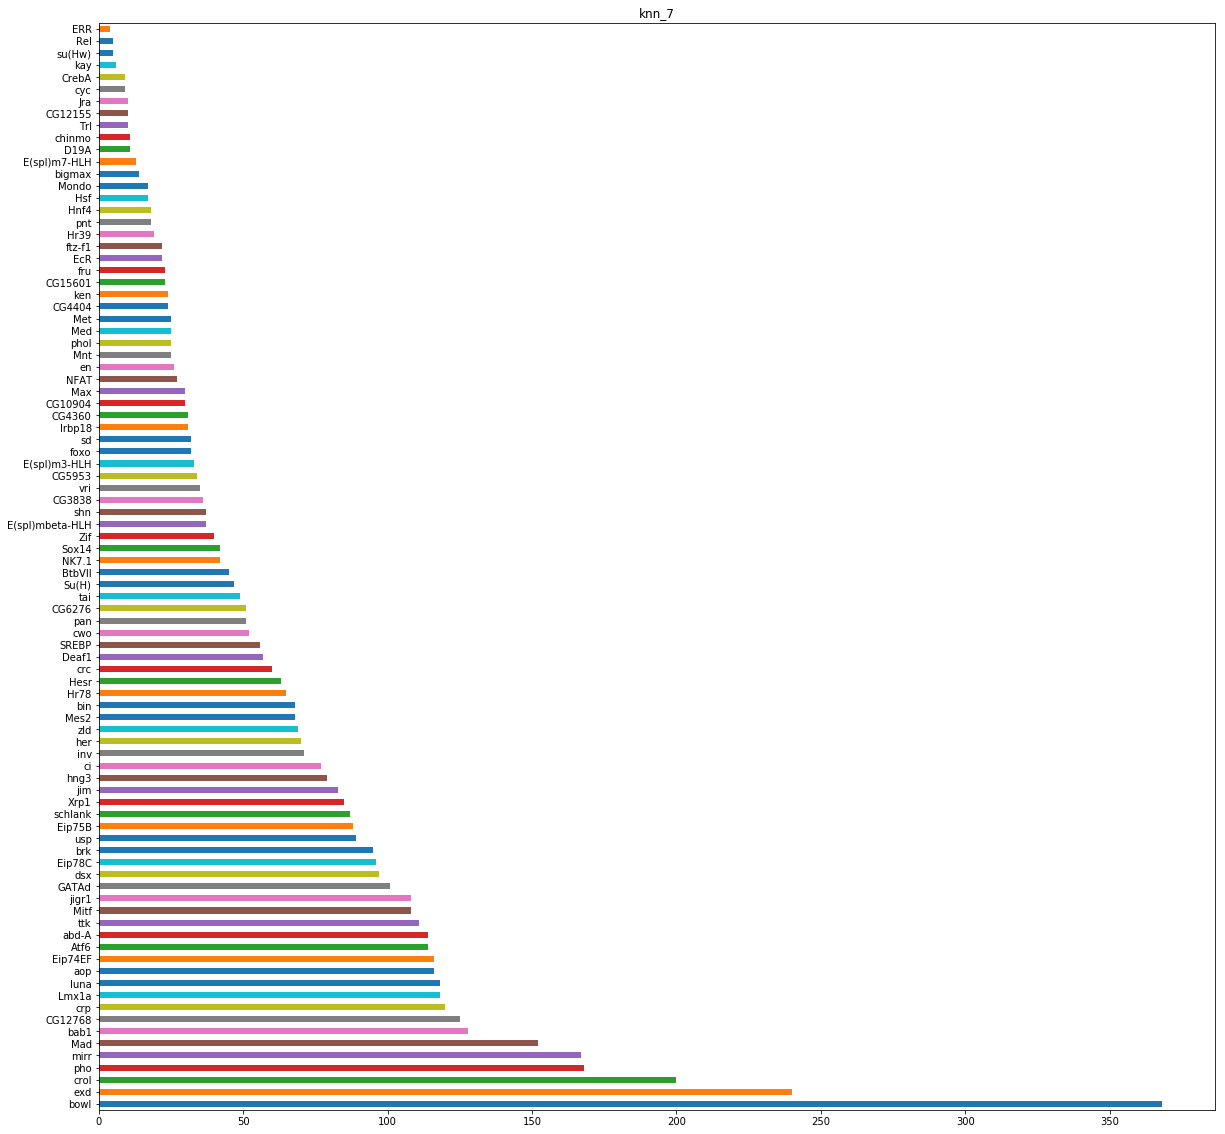

In [55]:
num_regulators = []
num_targets = []
num_edges = []
networks_symbols_high_conf = {}
for k in sorted(networks.keys()):
    plt.figure(figsize=(20,20))
    print k
    net = networks[k][networks[k]['beta.non.zero'] >= 30]
    networks_symbols_high_conf[k] = net.copy()
    networks_symbols_high_conf[k]['regulator'] = convert_col_from_Fbgn_ids_to_symbols(net['regulator'])
    networks_symbols_high_conf[k]['target'] = convert_col_from_Fbgn_ids_to_symbols(net['target'])
    regs = set(net['regulator'])
    targets = set(net['target'])    
    num_edges.append(net.shape[0])
    num_regulators.append(len(regs))
    num_targets.append(len(targets))
    some_cols = ['regulator', 'target', 'beta.sign.sum', 'beta.non.zero']
    print(networks_symbols_high_conf[k][some_cols][networks_symbols_high_conf[k]['target'].isin(terminal_filament_specific_genes)])
    print(networks_symbols_high_conf[k][some_cols][networks_symbols_high_conf[k]['regulator'].isin(terminal_filament_specific_tfs)])
    vals = networks_symbols_high_conf[k]['regulator'].value_counts()
    vals = vals[vals > 2]
    vals.plot(kind='barh')
    plt.title(k)
    plt.show()
    

[Text(0,0,'knn_10'), Text(0,0,'knn_3'), Text(0,0,'knn_5'), Text(0,0,'knn_7')]

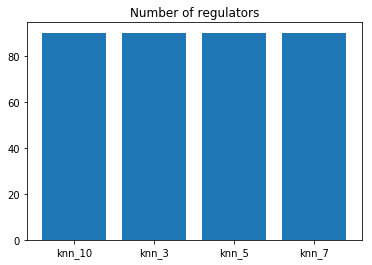

In [157]:
fig, ax = plt.subplots()
plt.title('Number of regulators')
ind = np.arange(1, 5)
ax.bar(ind, num_regulators)
ax.set_xticks(ind)
ax.set_xticklabels(sorted(networks.keys()))

<BarContainer object of 4 artists>

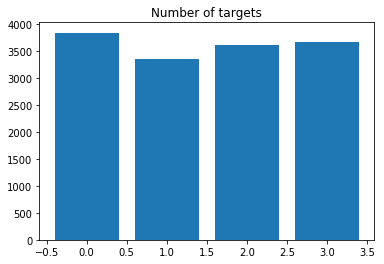

In [158]:
plt.title('Number of targets')
plt.bar(range(4), num_targets, align='center')

In [143]:
networks_symbols_high_conf.values()[0].shape

(5505, 7)

In [159]:
# Compare to each other: how self similar?
similarity_matrix = pd.DataFrame(np.zeros([len(networks), len(networks)]))
similarity_matrix.index = sorted(networks.keys())
similarity_matrix.columns = sorted(networks.keys())    
for k in sorted(networks.keys()):
    print k
    for (idx, row) in networks_symbols_high_conf[k].iterrows():
        src = row['regulator']
        trgt = row['target']
        for j in sorted(networks.keys()):
            if networks_symbols_high_conf[j][(networks_symbols_high_conf[j]['regulator'] == src) & (networks_symbols_high_conf[j]['target'] == trgt)].shape[0] > 0:
                similarity_matrix.loc[j, k] += 1

knn_10
knn_3
knn_5
knn_7


In [160]:
similarity_matrix

,knn_10,knn_3,knn_5,knn_7
knn_10,6258.0,1056.0,1887.0,2148.0
knn_3,1056.0,4829.0,1596.0,1367.0
knn_5,1887.0,1596.0,5505.0,2767.0
knn_7,2148.0,1367.0,2767.0,5629.0


Text(0.5,1,'Similarity Matrix: How many entries in common?')

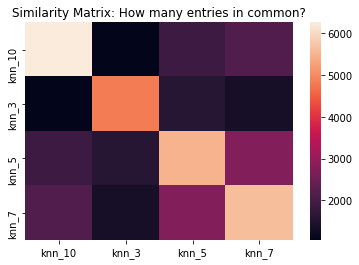

In [161]:
sns.heatmap(similarity_matrix)
plt.title('Similarity Matrix: How many entries in common?')

In [162]:
percentage_similarity_matrix = similarity_matrix / num_edges

Text(0.5,1,'percentage similar')

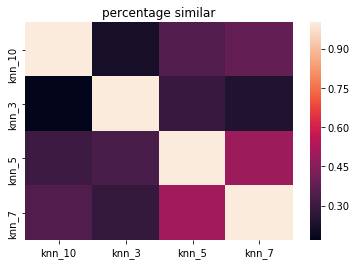

In [163]:
sns.heatmap(percentage_similarity_matrix)
plt.title('percentage similar')

In [60]:
nets = networks_symbols_high_conf.values() # networks_symbols_high_conf
combined_net = pd.concat(nets)

In [61]:
combined_net.shape

(22221, 7)

In [62]:
summed_net = combined_net.groupby(['regulator', 'target']).sum().sum(
    level=['regulator', 'target'])

In [63]:
top_interactions = summed_net.sort_values('beta.non.zero', ascending=False)
top_interactions

beta.sign.sum  beta.non.zero  var.exp.median  \
regulator    target                                                       
bab1         Rsf1                  240.0          240.0        2.708990   
zld          aay                   240.0          240.0        2.640888   
usp          Uhg7                  240.0          240.0        1.939117   
CG5953       CG3838                240.0          240.0        3.112414   
CG3838       CG5953                240.0          240.0        3.340080   
E(spl)m3-HLH E(spl)m2-BFM          240.0          240.0        3.632699   
bowl         14-3-3zeta            239.0          239.0        2.792151   
             GstE12                239.0          239.0        2.435318   
bab1         LanA                  239.0          239.0        2.366428   
Deaf1        Taf4                  239.0          239.0        1.554031   
E(spl)m3-HLH Hesr                  239.0          239.0        3.290508   
brk          Ten-a                 238.0          238.0        2.042965   
zld          Ect4                  238.0          238.0        2.129134   
cyc          CG3262                238.0          238.0        1.622979   
Xrp1         Moe                   238.0          238.0        2.528514   
usp          flw                   238.0          238.0        1.858224   
aop          skd                   238.0          238.0        2.731047   
jim          CG10543               238.0          238.0        1.529163   
brk          rho                   237.0          237.0        1.950712   
Atf6         CG32202               237.0          237.0        1.358780   
Xrp1         Chd64                 236.0          236.0        2.933367   
exd          CG5969                236.0          236.0        1.779182   
mirr         CG40160               236.0          236.0        1.968762   
             CG6766                236.0          236.0        2.371606   
brk          pum                   235.0          235.0        1.876520   
Hesr         E(spl)m3-HLH          235.0          235.0        2.847111   
bowl         RNASEK                235.0          235.0        2.866287   
crol         Hrb27C                235.0          235.0        2.131557   
mirr         CG14945               235.0          235.0        2.378057   
aop          tna                   235.0          235.0        3.259096   
...                                  ...            ...             ...   
shn          RpL5                   30.0           30.0        0.126335   
crc          glec                   30.0           30.0        0.065576   
bowl         Vha13                  30.0           30.0        0.165301   
EcR          Ucp4A                  30.0           30.0        0.043413   
Mitf         Ssb-c31a               30.0           30.0        0.053286   
EcR          Rpn7                   30.0           30.0        0.059758   
pho          emb                    30.0           30.0        0.075438   
             ebd1                   30.0           30.0        0.061729   
Mitf         CG15107                30.0           30.0        0.058425   
Met          magu                   30.0           30.0        0.049304   
bowl         mRpL22                 30.0           30.0        0.069249   
pho          alc                    30.0           30.0        0.063312   
ttk          Qtzl                   30.0           30.0        0.034002   
Hr78         CG18004                30.0           30.0        0.041589   
fru          CG5126                 30.0           30.0        0.048215   
             CG5390                 30.0           30.0        0.064465   
crp          eIF3e                  30.0           30.0        0.077495   
crc          Sin3A                  30.0           30.0        0.105399   
crp          eIF3g1                 30.0           30.0        0.106220   
fru          Gbp2                  -30.0           30.0        0.040656   
Mitf         CG1628                 30.0           3

In [48]:
mat_file = 'wtJ_TF_cells_k_7.tsv' #'combined_wtJ_and_wtF_TF_cells_smoothed_separately_with_k_7.tsv'
expression_data_just_wtj = pd.read_csv(os.path.join(output_dir, mat_file), sep='\t', index_col  = 0) #sep='\t',
mat_file = 'combined_wtJ_and_wtF_TF_cells_smoothed_separately_with_k_7.tsv'
expression_data = pd.read_csv(os.path.join(output_dir, mat_file), sep='\t', index_col  = 0) #sep='\t',


In [49]:
expression_data_just_wtj.head()

,AACTCCCTCCCGACTT-1,AAGGAGCGTTCCATGA-1,ACCAGTAAGCTAACAA-1,ACCTTTAGTGCAGGTA-1,ACGAGGAGTGGCTCCA-1,ACGATGTCATTTCACT-1,ACGCCAGGTTCAGTAC-1,ACGTCAACAATGTAAG-1,ACTTACTGTCCGACGT-1,ACTTACTTCGCAGGCT-1,...,TGACAACGTACGACCC-1,TGACTTTCAGACGCTC-1,TGCACCTCAAGCTGGA-1,TGCACCTTCACAACGT-1,TGCCAAACATTCGACA-1,TGGCGCACAGCATGAG-1,TGGCGCACAGCCACCA-1,TGTCCCATCCAATGGT-1,TTCGGTCAGAGCTGCA-1,TTGTAGGGTTGGACCC-1
FBgn0085412,11,43,33,19,17,17,28,15,41,21,...,20,19,15,17,17,15,27,17,21,21
FBgn0039265,23,38,25,33,19,24,33,17,25,17,...,15,23,17,19,24,27,53,19,17,17
FBgn0039532,2,7,4,4,2,1,5,2,5,2,...,1,3,2,2,1,3,5,2,1,1
FBgn0003046,10,16,40,15,7,7,8,7,26,27,...,28,10,7,12,7,31,8,7,26,26
FBgn0038274,2,0,6,2,0,0,1,1,0,3,...,4,1,1,1,0,5,2,0,5,5


In [220]:
expression_data[expression_data_just_wtj.columns].head()

,AACTCCCTCCCGACTT-1,AAGGAGCGTTCCATGA-1,ACCAGTAAGCTAACAA-1,ACCTTTAGTGCAGGTA-1,ACGAGGAGTGGCTCCA-1,ACGATGTCATTTCACT-1,ACGCCAGGTTCAGTAC-1,ACGTCAACAATGTAAG-1,ACTTACTGTCCGACGT-1,ACTTACTTCGCAGGCT-1,...,TGACAACGTACGACCC-1,TGACTTTCAGACGCTC-1,TGCACCTCAAGCTGGA-1,TGCACCTTCACAACGT-1,TGCCAAACATTCGACA-1,TGGCGCACAGCATGAG-1,TGGCGCACAGCCACCA-1,TGTCCCATCCAATGGT-1,TTCGGTCAGAGCTGCA-1,TTGTAGGGTTGGACCC-1
FBgn0085412,11,43,33,19,17,17,28,15,41,21,...,20,19,15,17,17,15,27,17,21,21
FBgn0039265,23,38,25,33,19,24,33,17,25,17,...,15,23,17,19,24,27,53,19,17,17
FBgn0039532,2,7,4,4,2,1,5,2,5,2,...,1,3,2,2,1,3,5,2,1,1
FBgn0003046,10,16,40,15,7,7,8,7,26,27,...,28,10,7,12,7,31,8,7,26,26
FBgn0038274,2,0,6,2,0,0,1,1,0,3,...,4,1,1,1,0,5,2,0,5,5


In [214]:
expression_data.head()

,AAACCTGTCCGCAGTG-1,AAAGTAGCAGACGCAA-1,AACGTTGTCTCCAACC-1,AACTCCCAGTGCCAGA-1,AAGACCTTCTCTGCTG-1,AAGTCTGTCCCTGACT-1,AATCCAGGTTATTCTC-1,ACACCAAAGCTTCGCG-1,ACACCAATCACCGGGT-1,ACGCAGCGTCGACTAT-1,...,TGACAACGTACGACCC-1,TGACTTTCAGACGCTC-1,TGCACCTCAAGCTGGA-1,TGCACCTTCACAACGT-1,TGCCAAACATTCGACA-1,TGGCGCACAGCATGAG-1,TGGCGCACAGCCACCA-1,TGTCCCATCCAATGGT-1,TTCGGTCAGAGCTGCA-1,TTGTAGGGTTGGACCC-1
FBgn0085412,11,28,14,17,9,17,11,10,18,17,...,20,19,15,17,17,15,27,17,21,21
FBgn0039265,12,38,24,20,9,28,24,30,41,28,...,15,23,17,19,24,27,53,19,17,17
FBgn0039532,2,13,2,3,2,4,4,9,7,5,...,1,3,2,2,1,3,5,2,1,1
FBgn0003046,16,35,25,17,15,3,25,4,1,3,...,28,10,7,12,7,31,8,7,26,26
FBgn0038274,2,4,3,4,2,2,2,3,2,2,...,4,1,1,1,0,5,2,0,5,5


In [206]:
import seaborn as sns

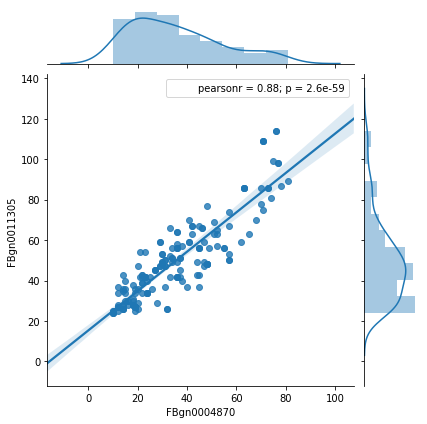

In [52]:
sns.jointplot('FBgn0004870', 'FBgn0011305', expression_data.transpose(), kind='reg')

//anaconda/envs/py27.13/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


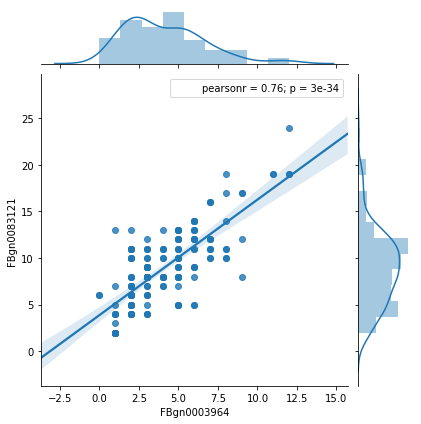

In [50]:
sns.jointplot('FBgn0003964', 'FBgn0083121', expression_data.transpose(), kind='reg')

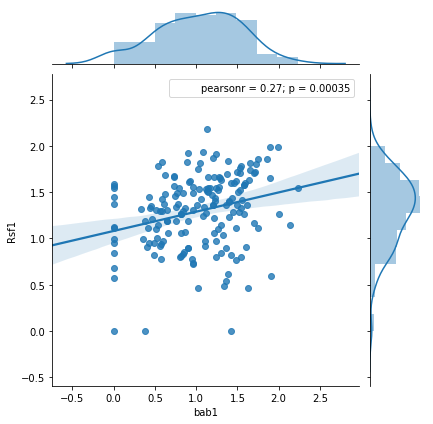

In [223]:
matrices_dir = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/network_inputs_and_outputs/inputs/03_02_2018"
mat_file = 'TF_data.csv'
cca_data = pd.read_csv(os.path.join(matrices_dir, mat_file), sep=',', index_col  = 0) #sep='\t',
g = sns.jointplot("bab1", "Rsf1", data=cca_data.transpose(), kind="reg")

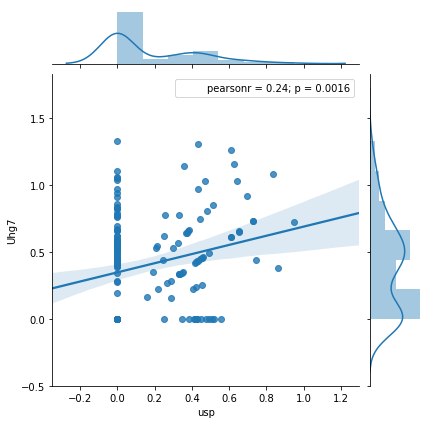

In [51]:
matrices_dir = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/network_inputs_and_outputs/inputs/03_02_2018"
mat_file = 'TF_data.csv'
cca_data = pd.read_csv(os.path.join(matrices_dir, mat_file), sep=',', index_col  = 0) #sep='\t',
g = sns.jointplot("usp", "Uhg7", data=cca_data.transpose(), kind="reg")

In [194]:
fname = "inferelator_network_shared_across_WtF_and_WtJ_Fbgn_knn_3_5_7_10.tsv"
top_interactions.to_csv(fname, sep='\t')

In [195]:
inters = pd.read_csv(fname, sep = '\t')

In [208]:
inters.head()

,regulator,target,beta.sign.sum,beta.non.zero,var.exp.median,combined_confidences,prior
0,FBgn0003964,FBgn0083121,240.0,240.0,1.939117,3.981903,4.0
1,FBgn0002609,FBgn0002592,240.0,240.0,3.632699,3.999967,4.0
2,FBgn0004870,FBgn0011305,240.0,240.0,2.708990,3.996439,0.0
3,FBgn0259789,FBgn0023129,240.0,240.0,2.640888,3.993335,4.0
4,FBgn0032587,FBgn0032130,240.0,240.0,3.112414,3.998585,0.0


In [122]:
for k in networks_symbols_high_conf:
    
    networks_symbols_high_conf[k].to_csv("inferelator_network_for_{}.tsv".format(k), sep='\t')
    

In [176]:
inters.head()

,regulator,target,beta.sign.sum,beta.non.zero,var.exp.median,combined_confidences,prior
0,bab1,Rsf1,240.0,240.0,2.708990,3.996439,0.0
1,zld,aay,240.0,240.0,2.640888,3.993335,4.0
2,usp,Uhg7,240.0,240.0,1.939117,3.981903,4.0
3,CG5953,CG3838,240.0,240.0,3.112414,3.998585,0.0
4,CG3838,CG5953,240.0,240.0,3.340080,3.998838,0.0


## New analysis of Marbach prior outputs

In [10]:
output_dir = '/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/network_inputs_and_outputs/outputs/Marbach_prior_wtJ_and_WtF_KNN_Smoothed'  # dmel_TF_filtered_experiment'

In [11]:
first_last_folders =   ['2018-04-04_08-53-55', '2018-04-04_08-53-55']  # only one folder for now
folders = os.listdir(output_dir)
relevant_folders = [i for i in sorted(folders) if (i >= first_last_folders[0]) & (i <= first_last_folders[1])]
relevant_folders


['2018-04-04_08-53-55']

In [13]:
# Generate networks
networks = {}
basename = 'knn_'
knns = [3]
for idx, i in enumerate(relevant_folders):
    filename = os.path.join(os.path.join(output_dir, i), 'network.tsv')
    name = basename + str(knns[idx])
    networks[name] = pd.read_csv(filename, sep='\t')
    networks[name].head()
    


knn_3
        regulator   target  beta.sign.sum  beta.non.zero
24          Asciz   CG2852           60.0           60.0
59           HHEX   Mur89F           59.0           59.0
164           zld       Dl           53.0           53.0
165          CTCF       Dl           53.0           53.0
297           run  Dh44-R2           49.0           49.0
324         CrebA     glec           48.0           48.0
476            E5    ImpE1           44.0           44.0
847          slbo    ImpE1           38.0           38.0
1424  FBgn0011764     glec           32.0           32.0
1657         slbo     Gbp1           30.0           30.0
     regulator     target  beta.sign.sum  beta.non.zero
13        bab2       Wnt4           60.0           60.0
311         en    CG43736           48.0           48.0
353         en     REPTOR           47.0           47.0
563         en      NK7.1           43.0           43.0
776         en        aop           39.0           39.0
1300        en        chn      

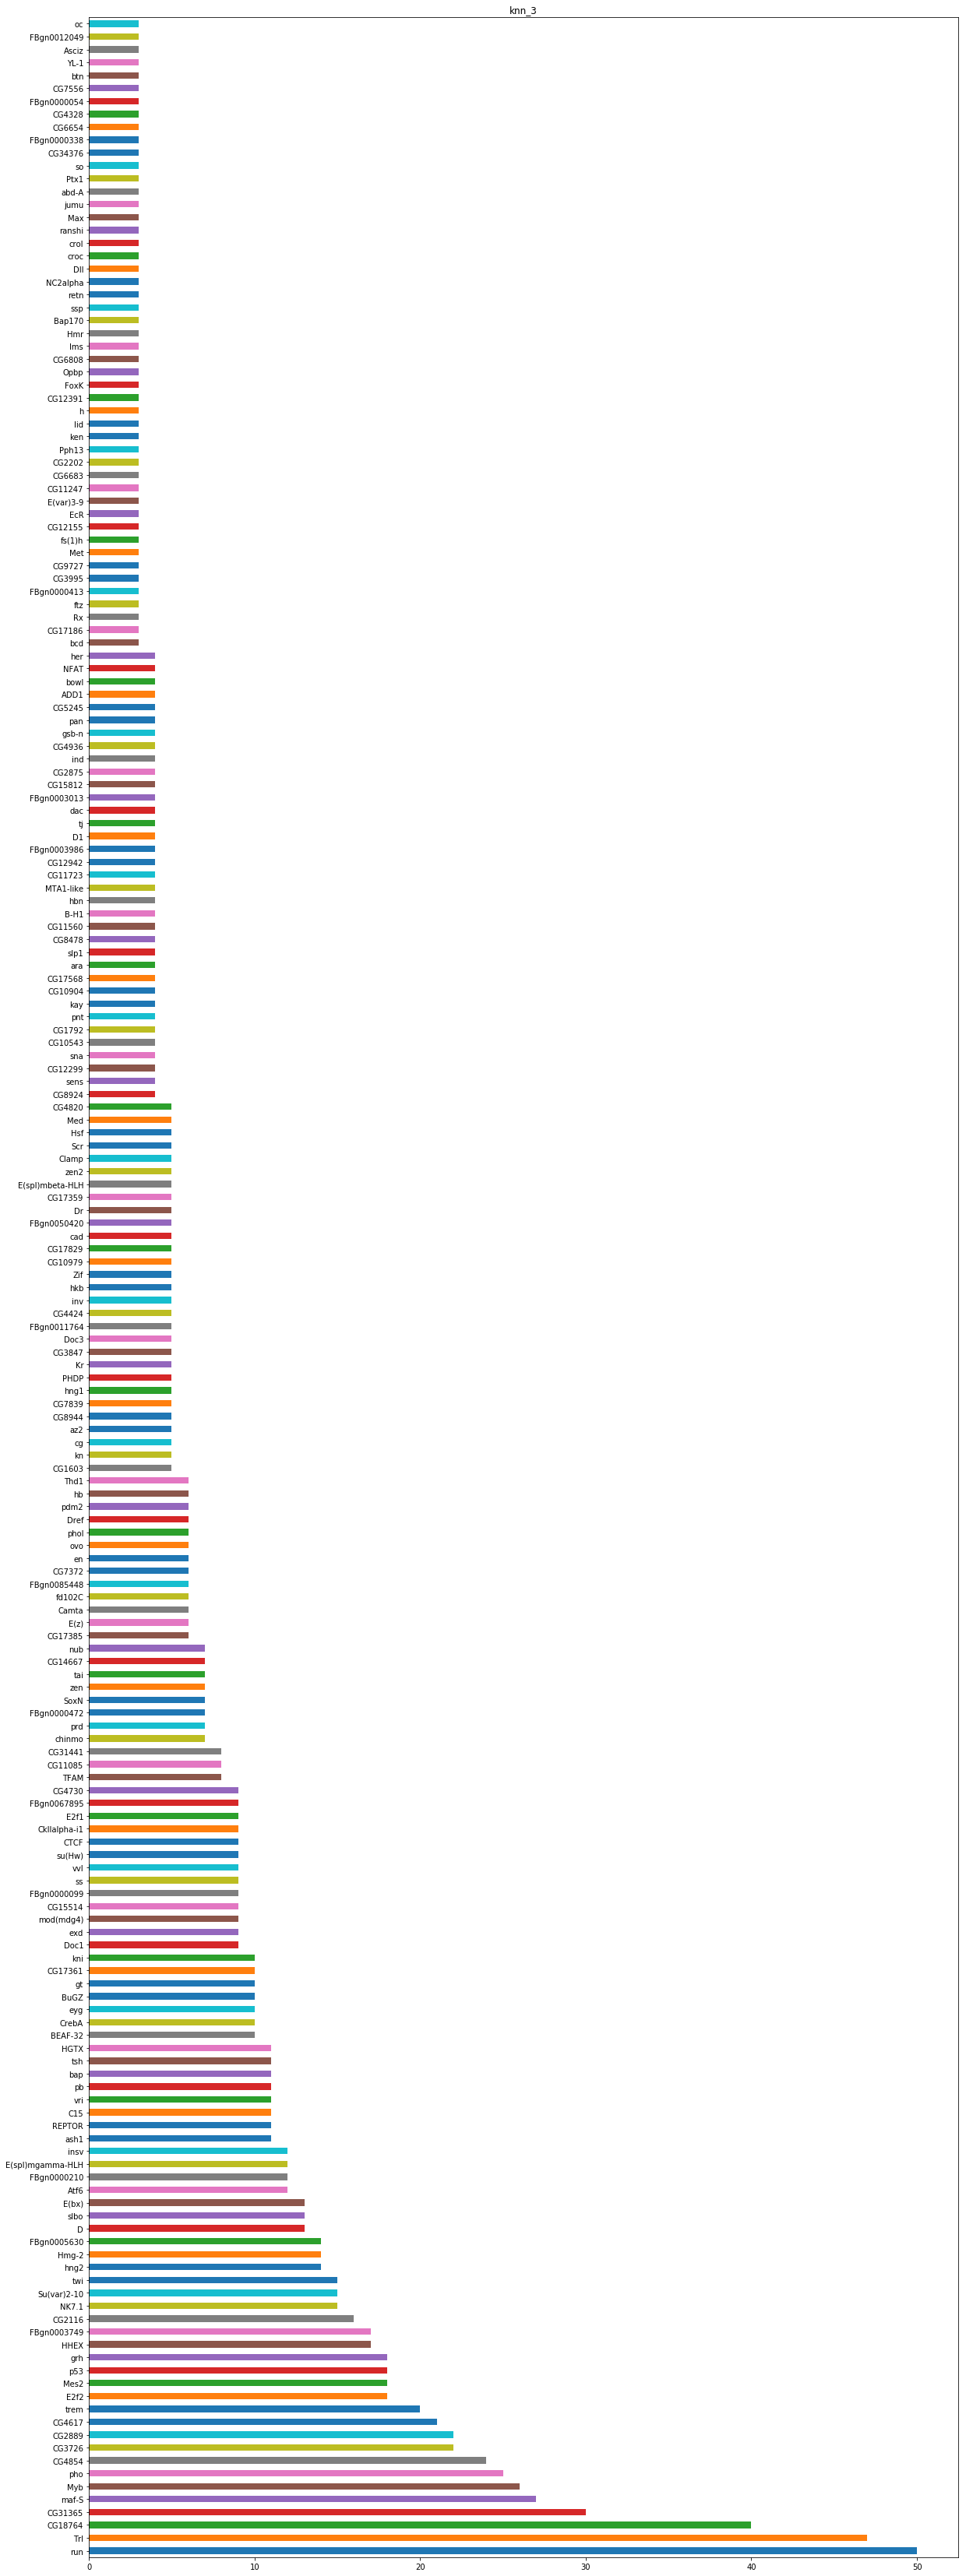

In [45]:
num_regulators = []
num_targets = []
num_edges = []
networks_symbols_high_conf = {}
for k in sorted(networks.keys()):
    plt.figure(figsize=(20,60))
    print k
    net = networks[k][networks[k]['beta.non.zero'] >= 30]
    networks_symbols_high_conf[k] = net.copy()
    networks_symbols_high_conf[k]['regulator'] = convert_col_from_Fbgn_ids_to_symbols(net['regulator'])
    networks_symbols_high_conf[k]['target'] = convert_col_from_Fbgn_ids_to_symbols(net['target'])
    regs = set(net['regulator'])
    targets = set(net['target'])    
    num_edges.append(net.shape[0])
    num_regulators.append(len(regs))
    num_targets.append(len(targets))
    some_cols = ['regulator', 'target', 'beta.sign.sum', 'beta.non.zero']
    print(networks_symbols_high_conf[k][some_cols][networks_symbols_high_conf[k]['target'].isin(terminal_filament_specific_genes)])
    print(networks_symbols_high_conf[k][some_cols][networks_symbols_high_conf[k]['regulator'].isin(terminal_filament_specific_tfs)])
    vals = networks_symbols_high_conf[k]['regulator'].value_counts()
    vals = vals[vals > 2]
    vals.plot(kind='barh')
    plt.title(k)
    plt.show()

[Text(0,0,'knn_3')]

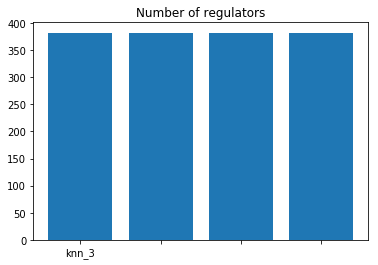

In [20]:
fig, ax = plt.subplots()
plt.title('Number of regulators')
ind = np.arange(1, 5)
ax.bar(ind, num_regulators)
ax.set_xticks(ind)
ax.set_xticklabels(sorted(networks.keys()))

In [26]:
networks[k]

,regulator,target,beta.sign.sum,beta.non.zero,var.exp.median,combined_confidences,prior
0,FBgn0000014,FBgn0004620,60.0,60.0,1.000000,0.999998,1.0
1,FBgn0036274,FBgn0004620,60.0,60.0,1.000000,0.999998,1.0
2,FBgn0014179,FBgn0086472,60.0,60.0,0.995433,0.999993,1.0
3,FBgn0000629,FBgn0034138,60.0,60.0,0.990766,0.999986,1.0
4,FBgn0039712,FBgn0014026,60.0,60.0,0.989568,0.999984,1.0
5,FBgn0039712,FBgn0010265,60.0,60.0,0.989557,0.999984,1.0
6,FBgn0026160,FBgn0038826,60.0,60.0,0.989227,0.999982,1.0
7,FBgn0030990,FBgn0003517,60.0,60.0,0.988578,0.999981,1.0
8,FBgn0034599,FBgn0034968,60.0,60.0,0.983929,0.999964,1.0
9,FBgn0050420,FBgn0028342,60.0,60.0,0.979639,0.999952,1.0


In [30]:
summed_net = networks[k]
top_interactions = summed_net.sort_values('beta.non.zero', ascending=False)[summed_net['beta.non.zero'] >= 20][summed_net['prior'] == 0]
top_interactions

/anaconda/envs/py27.13/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,regulator,target,beta.sign.sum,beta.non.zero,var.exp.median,combined_confidences,prior
27,FBgn0038852,FBgn0032774,60.0,60.0,0.720790,0.999563,0.0
30,FBgn0002735,FBgn0086711,60.0,60.0,0.600204,0.999254,0.0
63,FBgn0259234,FBgn0033351,-59.0,59.0,0.403595,0.981661,0.0
58,FBgn0003300,FBgn0025809,59.0,59.0,0.601988,0.982325,0.0
59,FBgn0038852,FBgn0038492,59.0,59.0,0.507262,0.982164,0.0
64,FBgn0016076,FBgn0011591,-59.0,59.0,0.394478,0.981643,0.0
46,FBgn0000964,FBgn0030306,-59.0,59.0,0.872560,0.983190,0.0
77,FBgn0003866,FBgn0000567,58.0,58.0,0.469943,0.965156,0.0
83,FBgn0003300,FBgn0031713,58.0,58.0,0.296945,0.963830,0.0
97,FBgn0034534,FBgn0028648,57.0,57.0,0.497364,0.948563,0.0


In [36]:
recovered_prior = summed_net.sort_values('beta.non.zero', ascending=False)[summed_net['prior'] != 0]
recovered_prior

/anaconda/envs/py27.13/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,regulator,target,beta.sign.sum,beta.non.zero,var.exp.median,combined_confidences,prior
0,FBgn0000014,FBgn0004620,60.0,60.0,1.000000,0.999998,1.0
33,FBgn0037207,FBgn0031769,60.0,60.0,0.635654,0.999055,1.0
24,FBgn0035407,FBgn0034753,60.0,60.0,0.782745,0.999726,1.0
25,FBgn0004054,FBgn0051676,60.0,60.0,0.779703,0.999721,1.0
26,FBgn0000338,FBgn0003884,60.0,60.0,0.771316,0.999719,1.0
29,FBgn0003028,FBgn0000261,60.0,60.0,0.648015,0.999449,1.0
31,FBgn0038805,FBgn0001224,60.0,60.0,0.568011,0.999244,1.0
32,FBgn0005638,FBgn0003447,60.0,60.0,0.540575,0.999070,1.0
34,FBgn0003345,FBgn0052594,60.0,60.0,0.474586,0.998651,1.0
22,FBgn0261239,FBgn0037624,60.0,60.0,0.850400,0.999758,1.0


In [37]:
recovered_prior.shape

(24745, 7)

In [41]:
np.sum(sup_table.sum())

285889.0

In [40]:
# Cut out prior values from the marbach gold standard
for (idx, row) in recovered_prior.iterrows():
    sup_table.loc[row['target'], row['regulator']] = 0